# Hypothesis: Transitioning to wind power can ensure energy independence for Lithuania while meeting environmental goals.

## Table of Contents

### Subtopic 1: Lithuania's Energy Mix (Liepa Žvirblytė)
### Subtopic 2: Energy consumption and projections (Elzė Binkauskaitė)
### Subtopic 3: Comparing energy balance between EU members (Danielius Andrejevas)
### Subtopic 4: Existing Wind Power Infrastructure (Morta Aleksiejūnaitė)
### Subtopic 5: Environmental Impact of energy self-sufficiency (Ugnė Kamarauskaitė)

# First Analysis: Lithuania's Energy Mix

### Hypothesis: While Lithuania has made significant progress in increasing the share of renewable energy in recent years, its energy mix remains heavily reliant on non-renewable sources.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

import os
os.chdir("/Users/Liepa/Downloads")

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

### Dataset Nr. 1 - Energy Commodities Breakdown and Production Overview

In [3]:
df1 = pd.read_csv("Energy commodities balances.csv")
df1

,Time,Indicator,Indicators,Energy (natural units),Unit,Value
0,2019,Energy commodities balances,Total gross production,"Geothermal energy, GWh",natural units,NaN
1,2020,Energy commodities balances,Total gross production,"Geothermal energy, GWh",natural units,NaN
2,2021,Energy commodities balances,Total gross production,"Geothermal energy, GWh",natural units,NaN
3,2022,Energy commodities balances,Total gross production,"Geothermal energy, GWh",natural units,NaN
4,2023,Energy commodities balances,Total gross production,"Geothermal energy, GWh",natural units,NaN
...,...,...,...,...,...,...
635,2019,Energy commodities balances,Final consumption in households,"Electricity, GWh",natural units,2912.7
636,2020,Energy commodities balances,Final consumption in households,"Electricity, GWh",natural units,3044.2
637,2021,Energy commodities balances,Final consumption in households,"Electricity, GWh",natural units,3410.1
638,2022,Energy commodities balances,Final consumption in households,"Electricity, GWh",natural units,3289.1


In [62]:
printmd(f"*For this analysis, we retrieved data from State Data Agency of Lithuania. It has a total of {df1.shape[0]} rows and {df1.shape[1]} columns. Later on we filter out the necessary data for this analysis. <br> Dataset: https://osp.stat.gov.lt/statistiniu-rodikliu-analize#/*")

*For this analysis, we retrieved data from State Data Agency of Lithuania. It has a total of 640 rows and 6 columns. Later on we filter out the necessary data for this analysis. <br> Dataset: https://osp.stat.gov.lt/statistiniu-rodikliu-analize#/*

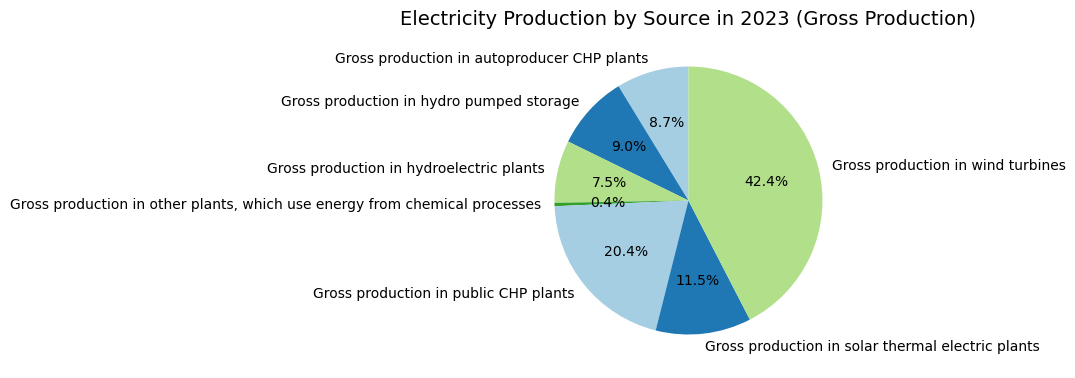

In [200]:
balance_data_2023 = df1[df1['Time'] == 2023]

electricity_data = balance_data_2023[(balance_data_2023['Energy (natural units)'] == 'Electricity, GWh') & #
                             (balance_data_2023['Indicators'].str.contains('Gross production'))]

gross_electricity_production = electricity_data.groupby('Indicators')['Value'].sum() # by mistake excluded in the submitted code

filtered_data = gross_electricity_production[gross_electricity_production > 0]

plt.figure(figsize=(9, 7)) 
filtered_data.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    fontsize=10
)
plt.title('Electricity Production by Source in 2023 (Gross Production)', fontsize=14)
plt.ylabel('')
plt.tight_layout()  
plt.show()

##### Description: This chart provides a breakdown of electricity generation by specific sources in 2023.
    
#### Conclusion: Wind turbines are already the backbone of Lithuania's renewable electricity production, emphasizing their importance in the energy mix.

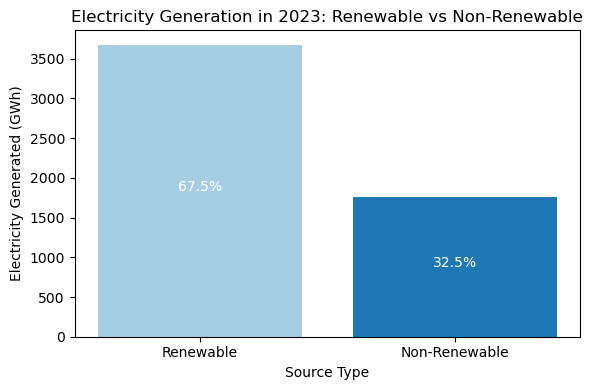

In [225]:
renewable_sources = [
    'Gross production in wind turbines',
    'Gross production in hydroelectric plants',
    'Gross production in solar thermal electric plants',
    'Gross production in geothermal plants'
]
non_renewable_sources = [
    'Gross production in public CHP plants',
    'Gross production in autoproducer CHP plants',
    'Gross production in public heat plants',
    'Gross production in autoproducer heat plants',
    'Gross production in other plants, which use energy from chemical processes'
]

renewable_data = electricity_data[electricity_data['Indicators'].isin(renewable_sources)]
non_renewable_data = electricity_data[electricity_data['Indicators'].isin(non_renewable_sources)]

renewable_total = renewable_data['Value'].sum()
non_renewable_total = non_renewable_data['Value'].sum()
total_electricity = renewable_total + non_renewable_total

plt.figure(figsize=(6, 4))
plt.bar(['Renewable', 'Non-Renewable'], [renewable_total, non_renewable_total], color=colors)
plt.title('Electricity Generation in 2023: Renewable vs Non-Renewable')
plt.ylabel('Electricity Generated (GWh)')
plt.xlabel('Source Type')
plt.text(0, renewable_total / 2, f"{(renewable_total / total_electricity) * 100:.1f}%", ha='center', color='white')
plt.text(1, non_renewable_total / 2, f"{(non_renewable_total / total_electricity) * 100:.1f}%", ha='center', color='white')
plt.tight_layout()
plt.show() 

##### Description: This bar chart compares the contributions of renewable and non-renewable sources to electricity generation in 2023.
##### Renewable electricity accounts for approximately 67.5%, while non-renewable sources make up the remaining 32.5%.

#### Conclusion: Lithuania's electricity generation is already dominated by renewables, showing a strong foundation for meeting environmental goals.

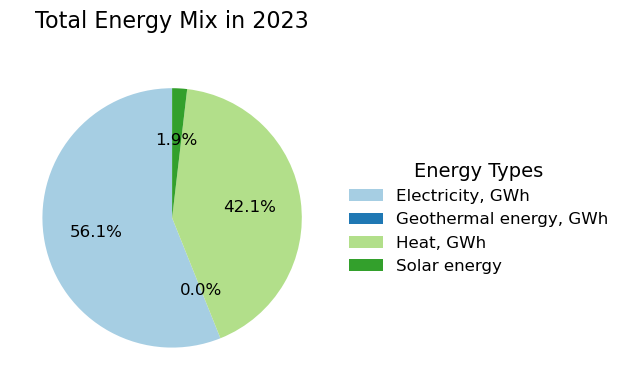

In [231]:
energy_mix = balance_data_2023.groupby('Energy (natural units)')['Value'].sum()

fig, ax = plt.subplots(figsize=(6, 4))  
colors = plt.cm.Paired(range(len(energy_mix)))  

wedges, texts, autotexts = ax.pie(
    energy_mix, 
    labels=None,  
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    textprops=dict(color="black", fontsize=12)  
)

ax.set_title('Total Energy Mix in 2023', fontsize=16, pad=20)

ax.legend(
    loc='center left',  
    labels=energy_mix.index, 
    fontsize=12,
    title="Energy Types", 
    title_fontsize=14, 
    frameon=False,  
    bbox_to_anchor=(1, 0.5) 
)

plt.tight_layout() 
plt.show()

##### Description: This chart displays the breakdown of Lithuania's total energy production in 2023 across different energy types (electricity, heat, solar energy, etc.).

#### Conclusion: Lithuania's energy production is heavily reliant on heat generation, which includes contributions from both renewable and non-renewable sources.
#### Electricity generation, a critical component for transitioning to renewables, constitutes a significant portion, but it needs to grow sustainably in the renewable segmenent.

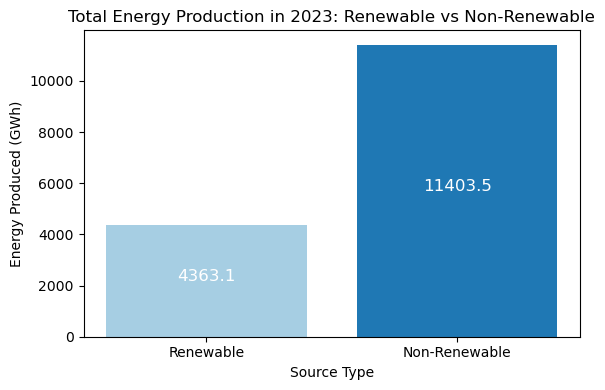

In [227]:
renewable_data_all = balance_data_2023[balance_data_2023['Indicators'].isin(renewable_sources)]
non_renewable_data_all = balance_data_2023[balance_data_2023['Indicators'].isin(non_renewable_sources)]

renewable_total_all = renewable_data_all['Value'].sum()
non_renewable_total_all = non_renewable_data_all['Value'].sum()

plt.figure(figsize=(6, 4))
plt.bar(['Renewable', 'Non-Renewable'], [renewable_total_all, non_renewable_total_all], color= colors)
plt.title('Total Energy Production in 2023: Renewable vs Non-Renewable')
plt.ylabel('Energy Produced (GWh)')
plt.xlabel('Source Type')

for i, v in enumerate([renewable_total_all, non_renewable_total_all]):
    plt.text(i, v / 2, f"{v:.1f}", ha='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()

##### Description: This chart shows the total energy production from renewable and non-renewable sources, including all types of energy (electricity, heat, etc.).
##### Renewable sources make up ~40% of the total energy production, while non-renewables still dominate with ~60%.

#### Conclusion: Lithuania's energy system is still heavily reliant on non-renewables when considering total energy production.
#### While the electricity sector is largely renewable, the dominance of non-renewables in heat generation reflects a broader dependence on fossil fuels.
#### This reinforces the need to transition not just electricity, but also heat generation, towards renewable sources like wind and geothermal energy.

## Conclusions from Dataset Nr. 1
- The electricity sector leads in renewable adoption, with 67.5% of production sourced from renewables.
- Wind power is the primary contributor to renewable electricity production, showcasing its potential as a key driver of sustainable energy.
- Other energy sectors, such as heat and chemical energy, demonstrate limited renewable integration, highlighting areas for improvement.
- A broader adoption of renewables across sectors is crucial for achieving energy independence and sustainability goals.                                                                                                                       
#### The success of renewables in the electricity sector underscores the viability of wind energy in driving Lithuania’s transition toward energy independence while meeting environmental objectives.

### Dataset Nr. 2 - Energy Balances: Production, Imports, and Exports in 2023

In [5]:
df2 = pd.read_csv("Energy balances (imports and exports).csv")
df2 

,Time,Indicator,Fuel and energy,Indicators,Unit,Value
0,2019,Energy balances,Total,Production of primary energy,TJ,83854.0
1,2019,Energy balances,Total,Production of primary energy,thousand TOE,2003.9
2,2020,Energy balances,Total,Production of primary energy,TJ,83572.0
3,2020,Energy balances,Total,Production of primary energy,thousand TOE,1997.2
4,2021,Energy balances,Total,Production of primary energy,TJ,92221.0
...,...,...,...,...,...,...
5695,2021,Energy balances,Heat,Final consumption in households,thousand TOE,501.2
5696,2022,Energy balances,Heat,Final consumption in households,TJ,19160.0
5697,2022,Energy balances,Heat,Final consumption in households,thousand TOE,457.7
5698,2023,Energy balances,Heat,Final consumption in households,TJ,18930.0


In [191]:
printmd(f"*For this analysis, we retrieved data from State Data Agency of Lithuania. It has a total of {df2.shape[0]} rows and {df2.shape[1]} columns. Later on we filter out the necessary data for this analysis. <br> Dataset: https://osp.stat.gov.lt/statistiniu-rodikliu-analize#/*")

*For this analysis, we retrieved data from State Data Agency of Lithuania. It has a total of 5700 rows and 6 columns. Later on we filter out the necessary data for this analysis. <br> Dataset: https://osp.stat.gov.lt/statistiniu-rodikliu-analize#/*

In [183]:
balance_data_2023 = df2[df2['Time'] == 2023]

key_indicators = ['Production of primary energy', 'Imports', 'Exports', 'Gross inland consumption', 'Final consumption, total)']
data_2023_indicators = balance_data_2023[balance_data_2023['Indicators'].isin(key_indicators)]

data_2023_tj = data_2023_indicators[data_2023_indicators['Unit'] == 'TJ']

data_2023_filtered = data_2023_tj[data_2023_tj['Fuel and energy'] == 'Total']

primary_production = data_2023_tj[data_2023_tj['Indicators'] == 'Production of primary energy']['Value'].values[0]
imports = data_2023_tj[data_2023_tj['Indicators'] == 'Imports']['Value'].values[0]
exports = data_2023_tj[data_2023_tj['Indicators'] == 'Exports']['Value'].values[0]
gross_inland_consumption = data_2023_tj[data_2023_tj['Indicators'] == 'Gross inland consumption']['Value'].values[0]

In [185]:
energy_independence_index = (primary_production / (primary_production + imports)) * 100
print(f"Energy Independence Index: {energy_independence_index:.2f}%")

Energy Independence Index: 13.27%


#### Only 13.3% of Lithuania's energy needs are met by domestic production, meaning the country relies heavily on imports (~87% dependency on imports).

In [61]:
net_energy_flow = primary_production + imports - exports
print(f"Net Energy Flow: {net_energy_flow:.0f} TJ")

Net Energy Flow: 299594 TJ


#### Lithuania has a net positive energy flow of 299594 TJ, meaning the imports outweigh exports significantly, ensuring enough energy for consumption and other needs.

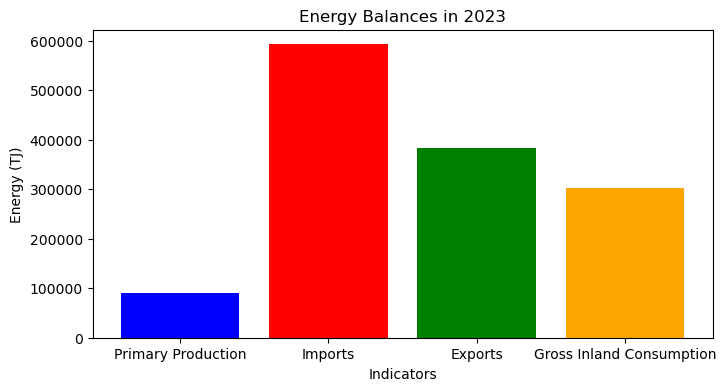

In [86]:
plt.figure(figsize=(8, 4))
balances = [primary_production, imports, exports, gross_inland_consumption]
labels = ['Primary Production', 'Imports', 'Exports', 'Gross Inland Consumption']

for i, value in enumerate(balances):
    plt.text(i, value + 5000, f"{value:.0f}", ha='center', fontsize=10)
    
plt.bar(labels, balances, color=['blue', 'red', 'green', 'orange'])
plt.title('Energy Balances in 2023')
plt.ylabel('Energy (TJ)')
plt.xlabel('Indicators')
plt.show()

##### Description: This chart displays the breakdown of Lithuania's energy balances in 2023.

#### Conclusion: Significant reliance of Lithuania on energy imports, as well as the relatively low contribution of primary production to gross inland consumption in 2023.

## Conclusions from Dataset Nr. 2
- Domestic production fell short of meeting the country’s energy demands, requiring significant reliance on imports.
- Lithuania recorded a positive net energy flow of 299,594 TJ, reflecting a surplus in available energy after accounting for production, imports, and exports.
- The reliance on imports emphasizes the need to enhance energy independence through increased domestic production.
- Strategies like adopting renewable energy sources, such as wind and solar power, offer a path to reducing import reliance and achieving greater energy security.

### Dataset Nr. 3 - Renewable Energy and Consumption Sectors: Shares and Trends in 2023

In [7]:
df3 = pd.read_csv("The share of energy from renewable sources.csv")
df3

,Time,Indicator,Consumption,Unit,Value
0,2023,The share of energy from renewable sources,The share of energy from renewable sources in ...,per cent,32.23
1,2023,The share of energy from renewable sources,The share of final consumption of energy from ...,per cent,54.31
2,2023,The share of energy from renewable sources,The share of gross consumption of electricity ...,per cent,36.21
3,2023,The share of energy from renewable sources,The share of final consumption of energy from ...,per cent,7.20
4,2022,The share of energy from renewable sources,The share of energy from renewable sources in ...,per cent,29.62
5,2022,The share of energy from renewable sources,The share of final consumption of energy from ...,per cent,51.54
6,2022,The share of energy from renewable sources,The share of gross consumption of electricity ...,per cent,26.46
7,2022,The share of energy from renewable sources,The share of final consumption of energy from ...,per cent,6.68
8,2021,The share of energy from renewable sources,The share of energy from renewable sources in ...,per cent,28.10
9,2021,The share of energy from renewable sources,The share of final consumption of energy from ...,per cent,48.62


In [235]:
printmd(f"*For this analysis, we retrieved data from State Data Agency of Lithuania. It has a total of {df3.shape[0]} rows and {df3.shape[1]} columns. Later on we filter out the necessary data for this analysis. <br> Dataset: https://osp.stat.gov.lt/statistiniu-rodikliu-analize#/*")

*For this analysis, we retrieved data from State Data Agency of Lithuania. It has a total of 20 rows and 5 columns. Later on we filter out the necessary data for this analysis. <br> Dataset: https://osp.stat.gov.lt/statistiniu-rodikliu-analize#/*

In [237]:
def filter_data_by_year(dataframe, year):
    """Filters the dataframe for a specific year."""
    return dataframe[dataframe['Time'] == year]

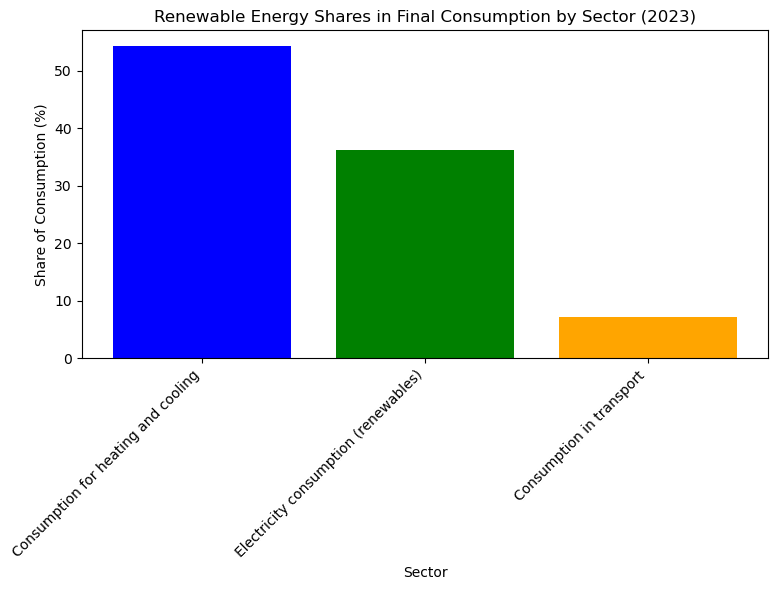

In [239]:
share_data_2023 = share_data_2023 = filter_data_by_year(df3, 2023)

overall_share = share_data_2023[share_data_2023['Consumption'] == 'The share of energy from renewable sources in gross final consumption of energy']

sector_shares = share_data_2023[share_data_2023['Consumption'].isin([
    'The share of final consumption of energy from renewable sources for heating and cooling',
    'The share of gross consumption of electricity from renewable energy sources',
    'The share of final consumption of energy from renewable sources in transport'
])]

renewable_trend = df3[df3['Consumption'] == 'The share of energy from renewable sources in gross final consumption of energy']

sector_labels = sector_shares['Consumption'].str.replace('The share of ', '').str.replace(' of energy from renewable sources', '').str.replace('gross consumption of ', '').str.replace('final ', '').str.capitalize()
sector_labels = sector_labels.str.replace('Electricity from renewable energy sources', 'Electricity consumption (renewables)')

sector_values = sector_shares['Value']

plt.figure(figsize=(8, 6))
plt.bar(sector_labels, sector_values, color=['blue', 'green', 'orange'])
plt.title("Renewable Energy Shares in Final Consumption by Sector (2023)")
plt.ylabel("Share of Consumption (%)")
plt.xlabel("Sector")

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

##### Description: This chart shows the share of renewable energy in final energy consumption across three sectors: heating and cooling, electricity consumption, and transport.

#### Conculsion: Lithuania's heating and cooling sector leads in renewable energy adoption, followed by electricity consumption, while the transport sector remains a key challenge with minimal renewable energy integration.


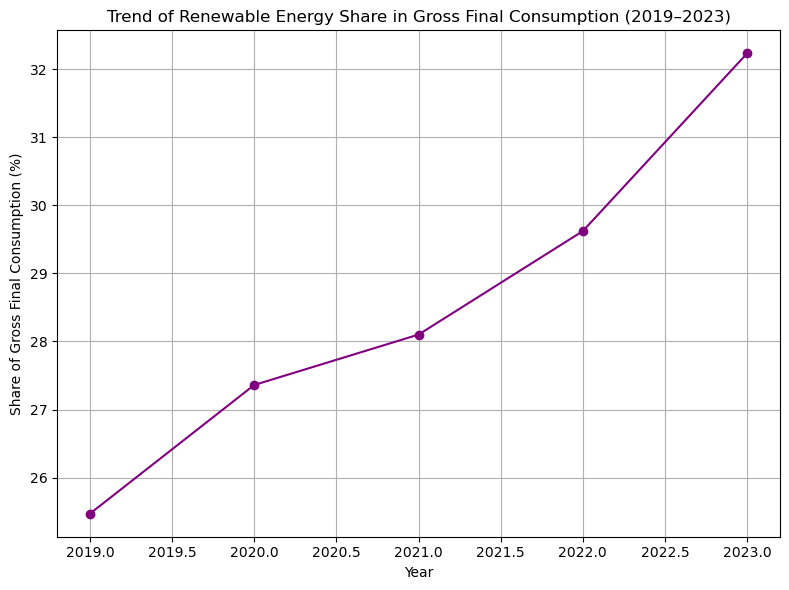

In 2023, the overall share of renewable energy in Lithuania's gross final consumption of energy was 32.23%.


In [18]:
trend_years = renewable_trend['Time']
trend_values = renewable_trend['Value']

plt.figure(figsize=(8, 6))
plt.plot(trend_years, trend_values, marker='o', linestyle='-', color='purple')
plt.title("Trend of Renewable Energy Share in Gross Final Consumption (2019–2023)")
plt.ylabel("Share of Gross Final Consumption (%)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

overall_value = overall_share['Value'].values[0]

##### Description: This graph presents a trendline for renewable energy shares in Lithuania's total final energy consumption over five years.

#### Conclusion: The trendline illustrates a steady increase in Lithuania's renewable energy share in gross final consumption from 2019 to 2023, showcasing consistent progress toward greener energy solutions. In 2023, the overall share of renewable energy in Lithuania's gross final consumption of energy was 32.23%.

## Conclusions from Dataset Nr. 3
- Lithuania has made notable advancements in incorporating renewables into its energy mix, particularly in heating and cooling.
- There is a consistent upward trajectory in renewable energy shares across sectors that signals Lithuania’s strong commitment to greener energy solutions.

# Final Conclusions from First Analysis
- Lithuania relies heavily on non-renewable energy, especially for heat and chemical energy production, while electricity leads in renewable adoption with 67.5% from wind energy.
- High energy imports highlight the gap between domestic production and consumption, emphasizing the need for greater energy independence through renewables.
- Heating and cooling show strong renewable integration, but transport lags significantly, requiring focused improvement.
#### The data aligns well with the hypothesis. While Lithuania has achieved commendable progress in renewable energy adoption, the energy mix continues to show significant reliance on non-renewable sources. This underscores the importance of accelerating the transition to renewables across all energy sectors to ensure energy independence and sustainability.

# Second analysis: Energy consumption and projections 

### Hypothesis: Energy consumption in Lithuania is decreasing over time due to improvements in energy efficiency and changing consumption patterns in households and industries

### Data collection and preprocessing

For this analysis, data was taken from the State Data Agency of Lithuania. The dataset had 45,550 rows and 13 columns, providing information on various indicators related to energy consumption across sectors and sources. Given the dataset's size and complexity, SQL was used to prepare the data into smaller datasets, to make it more manageable and tailored for specific analyses. 

*Dataset: https://osp.stat.gov.lt/*

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.cm as cm
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
os.chdir('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads')
energy_consumption = pd.read_csv('energy_consumption_cleaned.csv')
renewables_share = pd.read_csv('renewable_energy_share_percentage.csv')
household_consumption = pd.read_csv('household_energy_consumption.csv')
industry_consumption = pd.read_csv('industry_energy_consumption.csv')
viridis = plt.colormaps['viridis']

### Datasets Nr. 1 - Household and industry energy consumption overview

*The SQL code used to processes and filter the raw energy_data table to create two key datasets: household energy consumption and industry energy consumption is displayed bellow. It extracted relevant data based on specific indicators, such as "Fuel and energy consumption in households by type of "end use" and "Energy consumption in industry," cleansed it and calculated aggregated consumption values.*

In [ ]:
# CREATE TABLE energy_data (
#     time INT,
#     indicator VARCHAR(255),
#     fuel_and_energy VARCHAR(255),
#     indicators VARCHAR(255),
#     consumption VARCHAR(255),
#     fuel_and_energy_thousand_toe_tj VARCHAR(255),
#     type_of_electricity_generation_installation VARCHAR(255),
#     fuel_and_energy_1 VARCHAR(255),
#     type_of_end_use VARCHAR(255),
#     economic_activity_nace_rev_2 VARCHAR(255),
#     energy_thousand_toe_tj VARCHAR(255),
#     unit VARCHAR(10),
#     value FLOAT
# );

# LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/mysql_compatible_data.csv'
# INTO TABLE energy_data
# FIELDS TERMINATED BY ',' 
# ENCLOSED BY '"' 
# LINES TERMINATED BY '\n'
# IGNORE 1 ROWS;

# ALTER TABLE energy_data
# MODIFY COLUMN value VARCHAR(255),
# MODIFY COLUMN unit VARCHAR(50);

# CREATE TABLE household_energy_consumption AS
# SELECT 
#     time,
#     type_of_end_use AS end_use,
#     CAST(value AS DECIMAL(15, 2)) AS consumption
# FROM 
#     energy_data
# WHERE 
#     indicator = 'Fuel and energy consumption in households by type of end use'
#     AND type_of_end_use IS NOT NULL
#     AND value REGEXP '^[0-9]+(\\.[0-9]+)?$'
# ORDER BY 
#     time, end_use;

# SELECT 'time', 'end_use', 'consumption'
# UNION ALL
# SELECT time, end_use, consumption
# FROM household_energy_consumption
# INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/household_energy_consumption.csv'
# FIELDS TERMINATED BY ',' 
# ENCLOSED BY '"'
# LINES TERMINATED BY '\n';

# CREATE TABLE industry_energy_consumption AS
# SELECT 
#     time,
#     type_of_end_use AS end_use,
#     SUM(CAST(value AS DECIMAL(15, 2))) AS total_consumption
# FROM 
#     energy_data
# WHERE 
#     indicator = 'Energy consumption in industry'
#     AND type_of_end_use IS NOT NULL
#     AND value REGEXP '^[0-9]+(\\.[0-9]+)?$'
# GROUP BY 
#     time, end_use
# ORDER BY 
#     time, end_use;

# SELECT 'time', 'end_use', 'total_consumption'
# UNION ALL
# SELECT time, end_use, total_consumption
# FROM industry_energy_consumption
# INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/industry_energy_consumption.csv'
# FIELDS TERMINATED BY ',' 
# ENCLOSED BY '"'
# LINES TERMINATED BY '\n';

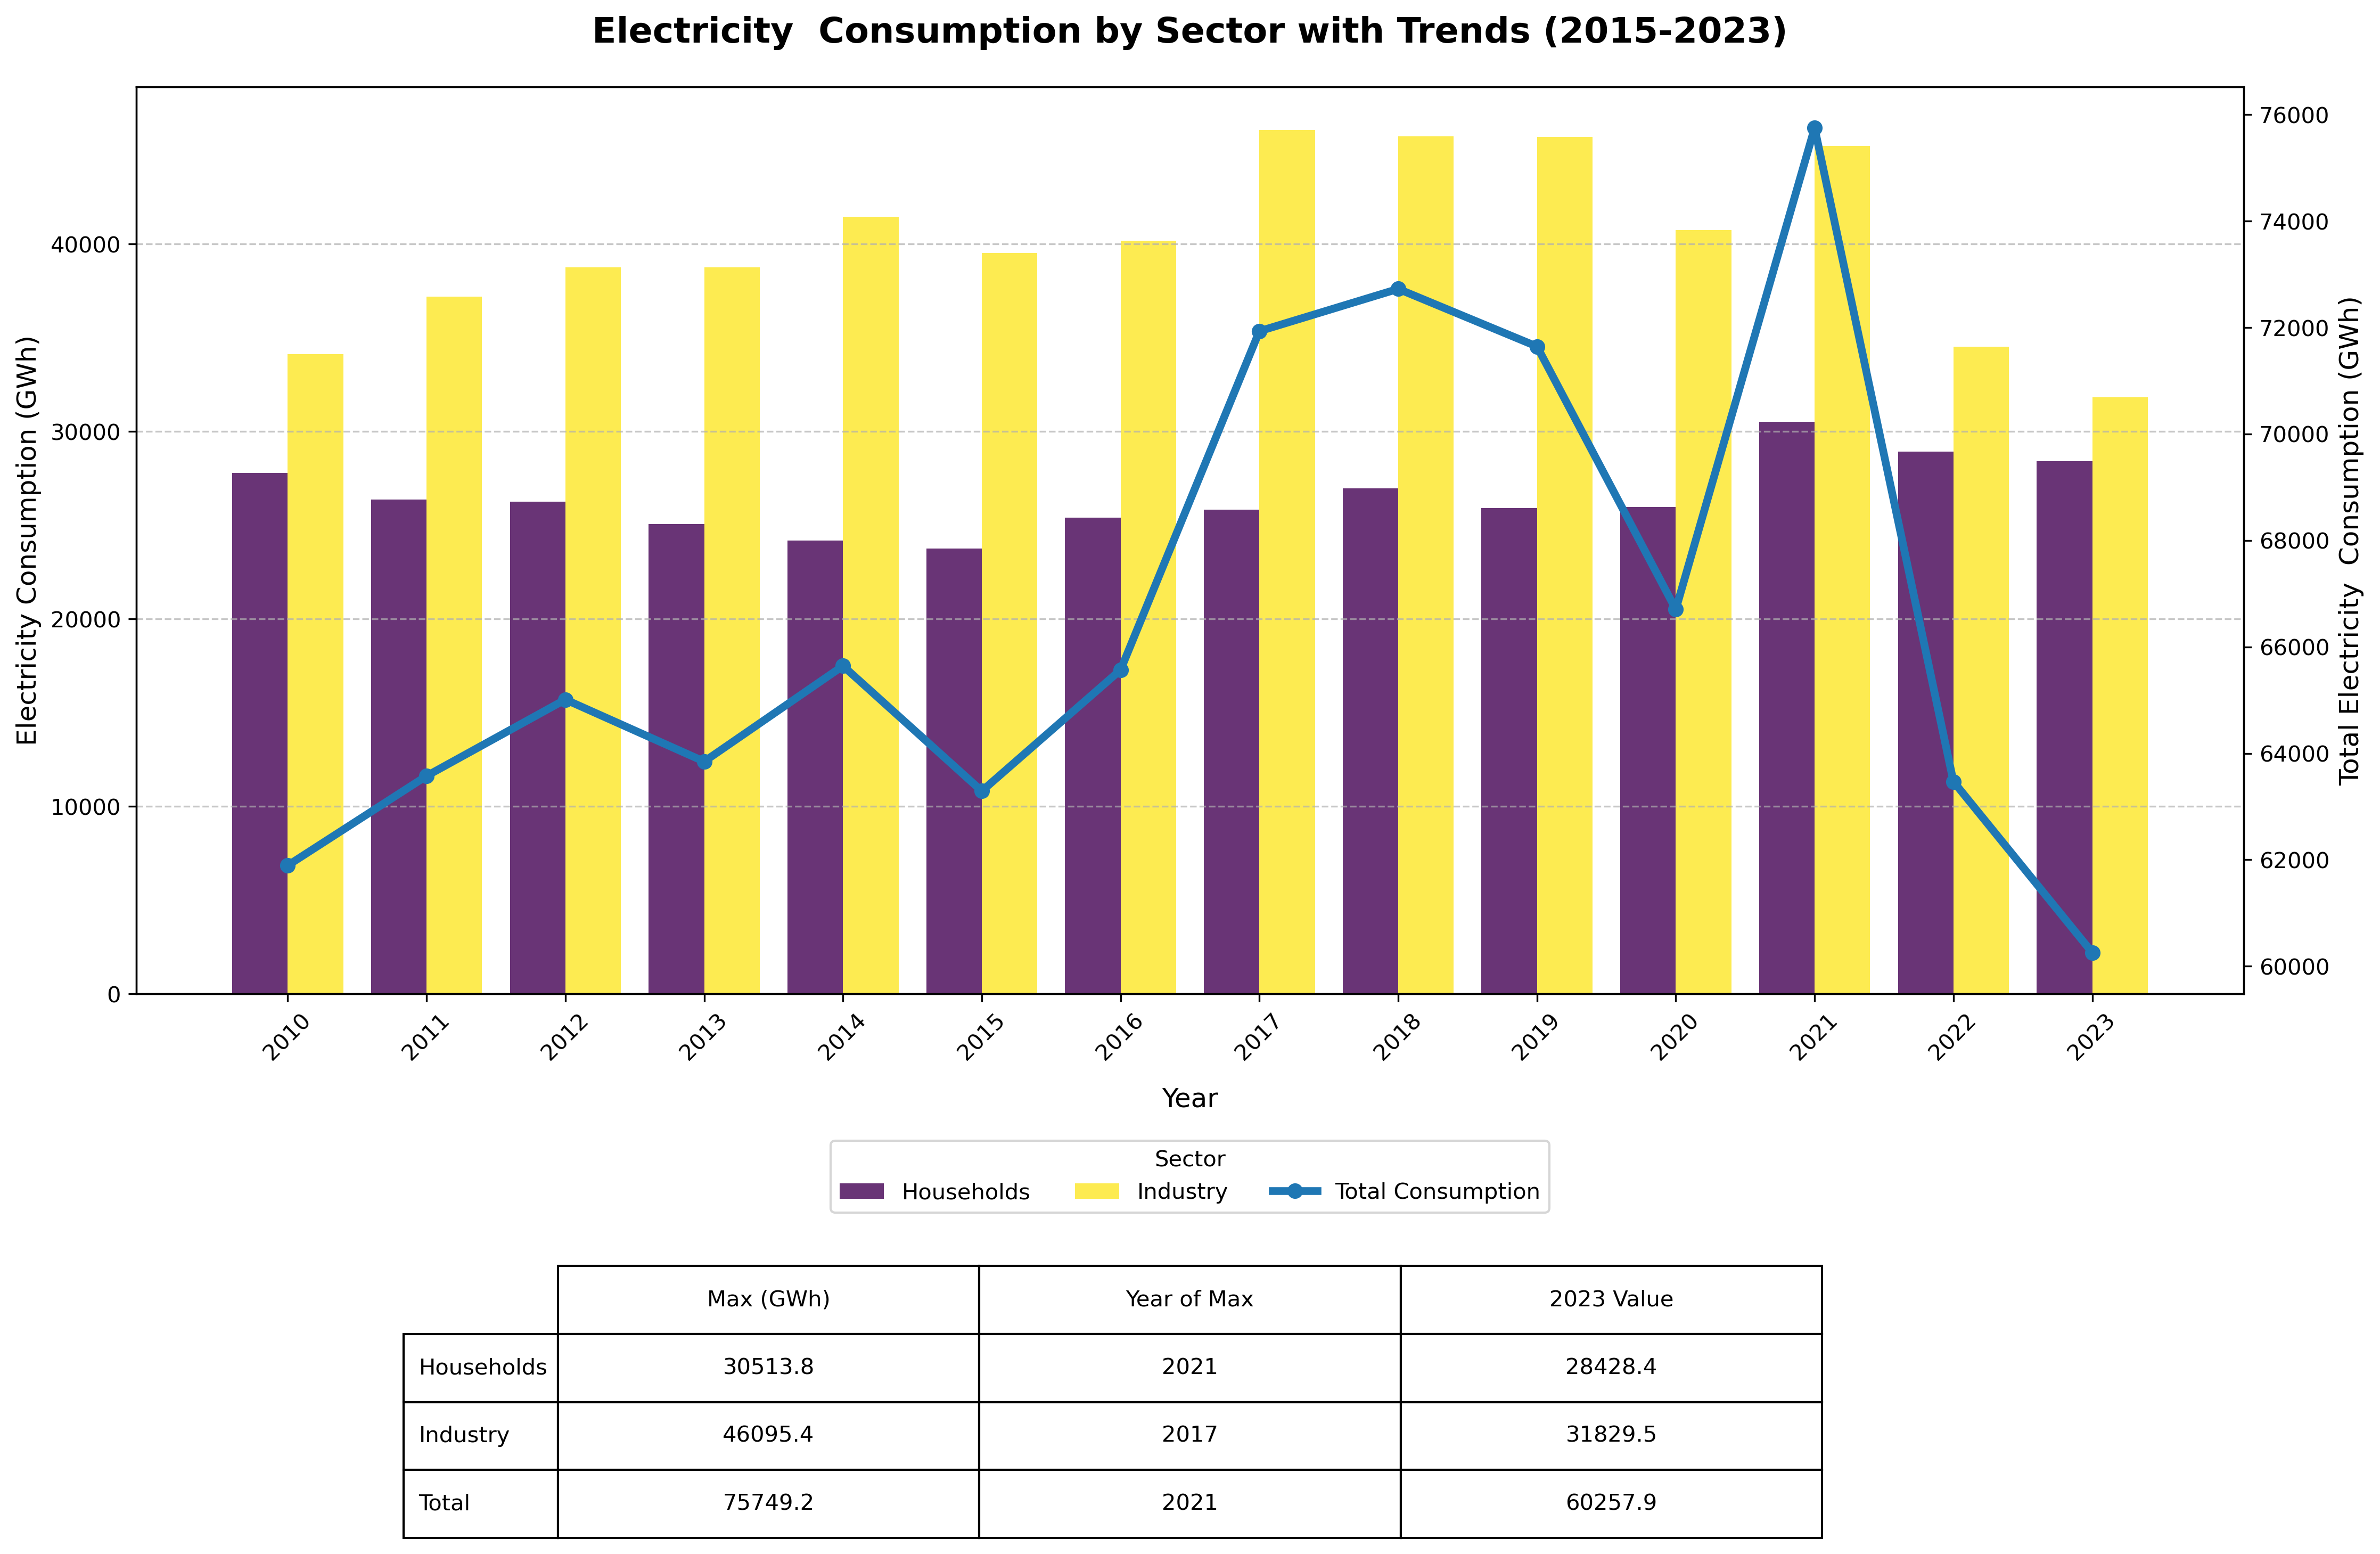

In [21]:
household_consumption = pd.read_csv('household_energy_consumption.csv')
industry_consumption = pd.read_csv('industry_energy_consumption.csv')

household_aggregated = household_consumption.groupby('time')['consumption'].sum().reset_index()
household_aggregated.rename(columns={'consumption': 'Households'}, inplace=True)
industry_aggregated = industry_consumption.rename(columns={'total_consumption': 'Industry'})

sector_combined = pd.merge(household_aggregated, industry_aggregated, on='time', how='inner')
sector_combined['Total'] = sector_combined['Households'] + sector_combined['Industry']

x = sector_combined['time'] 
x_positions = np.arange(len(x))

max_households = sector_combined['Households'].max()
max_households_year = sector_combined.loc[sector_combined['Households'].idxmax(), 'time']
current_households = sector_combined.loc[sector_combined['time'] == 2023, 'Households'].values[0]

max_industry = sector_combined['Industry'].max()
max_industry_year = sector_combined.loc[sector_combined['Industry'].idxmax(), 'time']
current_industry = sector_combined.loc[sector_combined['time'] == 2023, 'Industry'].values[0]

max_total = sector_combined['Total'].max()
max_total_year = sector_combined.loc[sector_combined['Total'].idxmax(), 'time']
current_total = sector_combined.loc[sector_combined['time'] == 2023, 'Total'].values[0]

viridis = plt.colormaps['viridis']
color_values = np.linspace(0, 1, 2)
colors = [viridis(val) for val in color_values]

fig, ax1 = plt.subplots(figsize=(15, 19), dpi=300) 
bar_width = 0.4

ax1.bar(x_positions - bar_width/2, sector_combined['Households'], bar_width, label='Households', 
        color=colors[0], alpha=0.8)
ax1.bar(x_positions + bar_width/2, sector_combined['Industry'], bar_width, label='Industry', 
        color=colors[1], alpha=0.8)

ax2 = ax1.twinx()
ax2.plot(x_positions, sector_combined['Total'], label='Total Consumption',  linewidth=3.5,linestyle='-', marker='o')

ax1.set_title('Electricity  Consumption by Sector with Trends (2015-2023)', fontsize=16, pad=20,weight='bold')
ax1.set_xlabel('Year', fontsize=12, labelpad=10)
ax1.set_ylabel('Electricity Consumption (GWh)', fontsize=12)
ax2.set_ylabel('Total Electricity  Consumption (GWh)', fontsize=12)

ax1.set_xticks(x_positions)
ax1.set_xticklabels(x, rotation=45) 

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, title='Sector')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

data_table = [[max_households, max_households_year, current_households],
[max_industry, max_industry_year, current_industry],
[max_total, max_total_year, current_total]]

column_labels = ["Max (GWh)", "Year of Max", "2023 Value"]
row_labels = ["Households", "Industry", "Total"]

table = plt.table(cellText=data_table, colLabels=column_labels, rowLabels=row_labels,
loc='bottom', cellLoc='center', bbox=[0.2, -0.6, 0.6, 0.3])

plt.tight_layout(rect=[0, 0.15, 1, 0.95])

plt.show()

##### Description: This chart provides an overview of electricity consumption trends across households, industry, and total consumption from 2015 to 2023. The table highlights key metrics such as the maximum consumption year and the corresponding values for each sector.
##### Electricity consumption peaked at 30,513.8 GWh in 2021 but declined to 28,428.4 GWh in 2023, reflecting a reduction of approximately 6.8%. Industry: Reached its maximum of 46,095.4 GWh in 2017 and decreased to 31,829.5 GWh by 2023, showing a significant decline. Total Consumption: Peaked in 2021 at 75,749.2 GWh and dropped to 60,257.9 GWh in 2023, indicating a sharp reduction likely due to external factors such as energy efficiency measures or reduced industrial demand.
#### Conclusion: Household and industrial electricity consumption are trending downward, with total electricity consumption reflecting a 20.5% reduction from its peak in 2021. This decline indicates the potential impact of energy efficiency measures, changes in industrial production, or broader economic shifts.

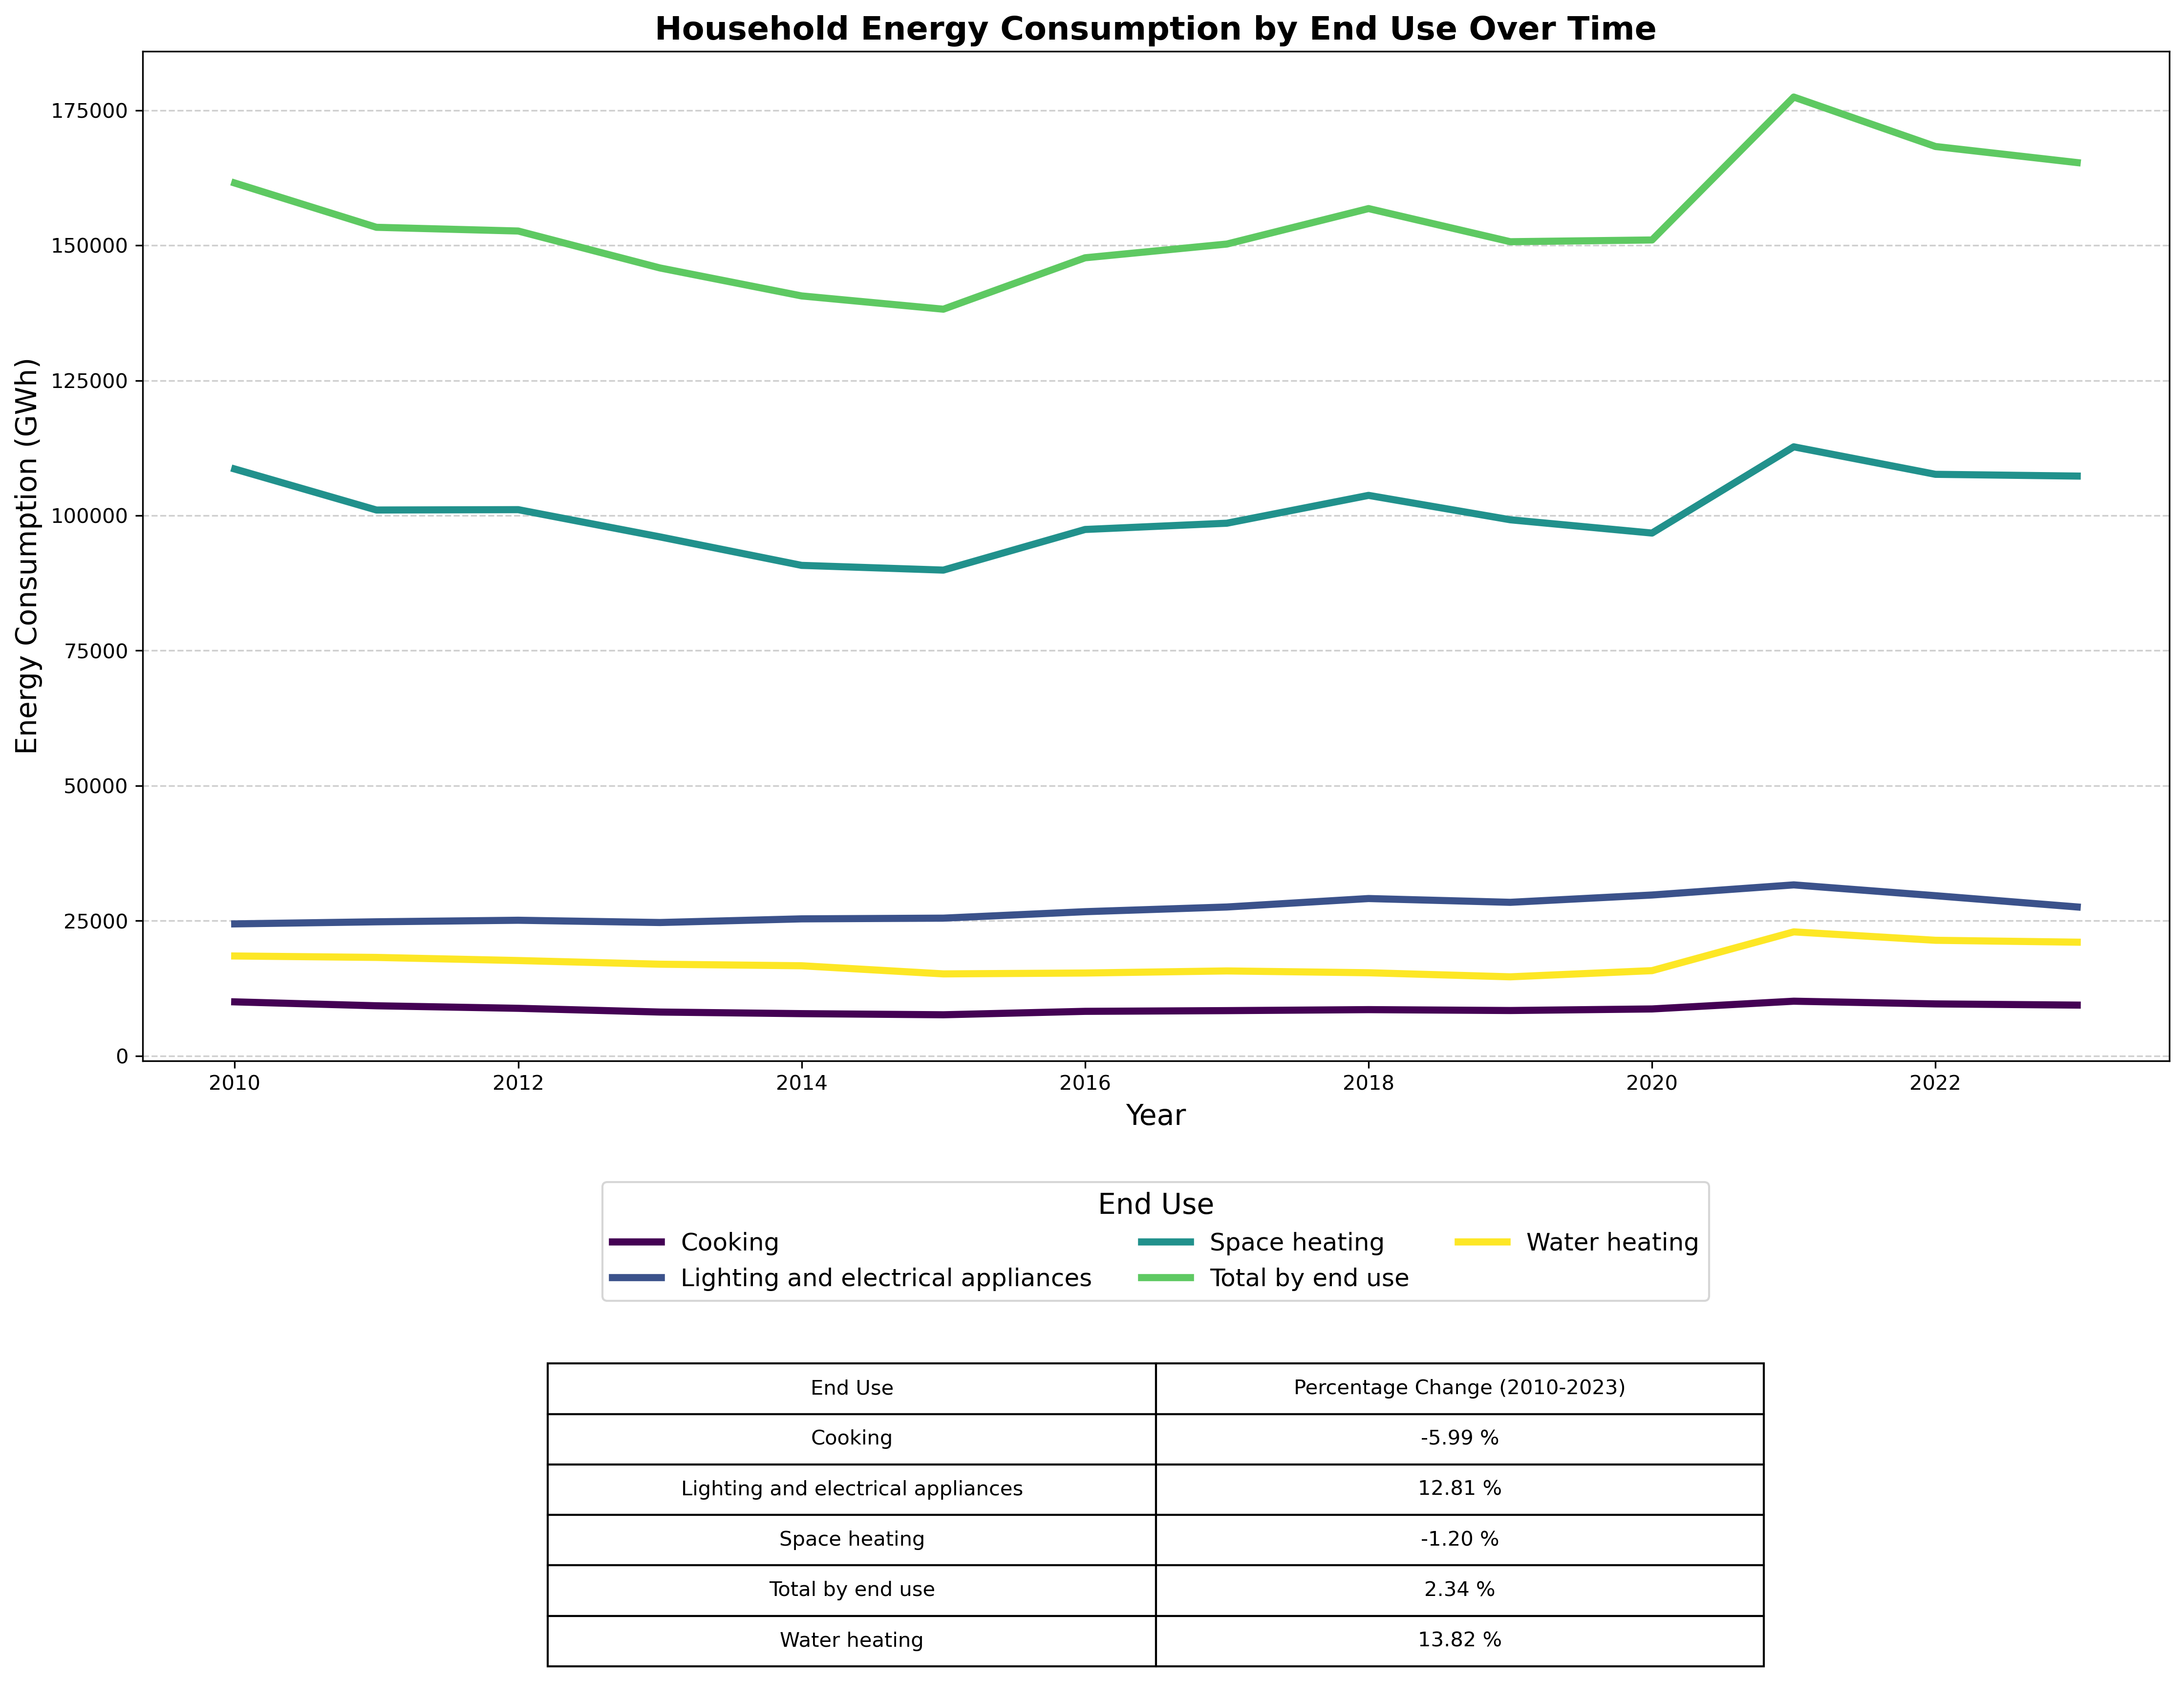

In [24]:
household_consumption = pd.read_csv('household_energy_consumption.csv')
household_consumption['consumption'] = household_consumption['consumption'] * 11.63  

sector_pivot_gwh = household_consumption.groupby(['time', 'end_use'])['consumption'].sum().unstack(fill_value=0)

start_year = sector_pivot_gwh.index.min()
end_year = sector_pivot_gwh.index.max()

percentage_changes = {
    column: ((sector_pivot_gwh.loc[end_year, column] - sector_pivot_gwh.loc[start_year, column]) / 
             sector_pivot_gwh.loc[start_year, column] * 100 if sector_pivot_gwh.loc[start_year, column] != 0 else 0)
    for column in sector_pivot_gwh.columns
}

table_data = [[category, f"{percentage_changes[category]:.2f} %"] for category in percentage_changes.keys()]
column_labels = ["End Use", "Percentage Change (2010-2023)"]

color_values = np.linspace(0, 1, len(household_consumption['end_use'].unique()))
colors = [viridis(val) for val in color_values]

plt.figure(figsize=(15, 22), dpi=300)
for i, column in enumerate(sector_pivot_gwh.columns):
    plt.plot(
        sector_pivot_gwh.index,
        sector_pivot_gwh[column],
        label=column,
        color=colors[i],
        linewidth=3.5
    )

plt.legend(title="End Use", fontsize=12, title_fontsize=14, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.title("Household Energy Consumption by End Use Over Time", fontsize=16,weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Energy Consumption (GWh)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.table(cellText=table_data, colLabels=column_labels, loc='bottom', cellLoc='center',  bbox=[0.2, -0.6, 0.6, 0.3])
plt.tight_layout(rect=[0, 0.15, 1, 0.95])  
plt.show()


##### Description: This chart shows household energy consumption by end use from 2010 to 2023, focusing on categories such as space heating, water heating, and lighting. The table provides percentage changes over the period.
##### Water heating increased by 13.82% as well as lighting and appliances consumption rose by 12.81%. However, space heating and cooking showed slight decreases.
#### Conclusion: Household energy consumption patterns indicate a shift toward increased usage of water heating and lighting, likely driven by lifestyle changes and technological advancements. However, total household consumption rose by only 2.34%, reflecting improved energy efficiency in other areas.

### Dataset Nr. 2- Energy consumption by source overieview

##### *The SQL code used to create the dataset of energy consumption is displayed bellow.*

In [ ]:
# CREATE TABLE energy_consumption_aggregated_cleaned AS
# SELECT 
#     time,
#     energy_source,
#     SUM(consumption) AS total_consumption
# FROM 
#     energy_consumption_by_source
# GROUP BY 
#     time, energy_source
# ORDER BY 
#     time, energy_source;

# SELECT 'time', 'energy_source', 'total_consumption'
# UNION ALL
# SELECT time, energy_source, total_consumption
# FROM energy_consumption_aggregated_cleaned
# INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/energy_consumption_cleaned.csv'
# FIELDS TERMINATED BY ',' 
# ENCLOSED BY '"'
# LINES TERMINATED BY '\n';

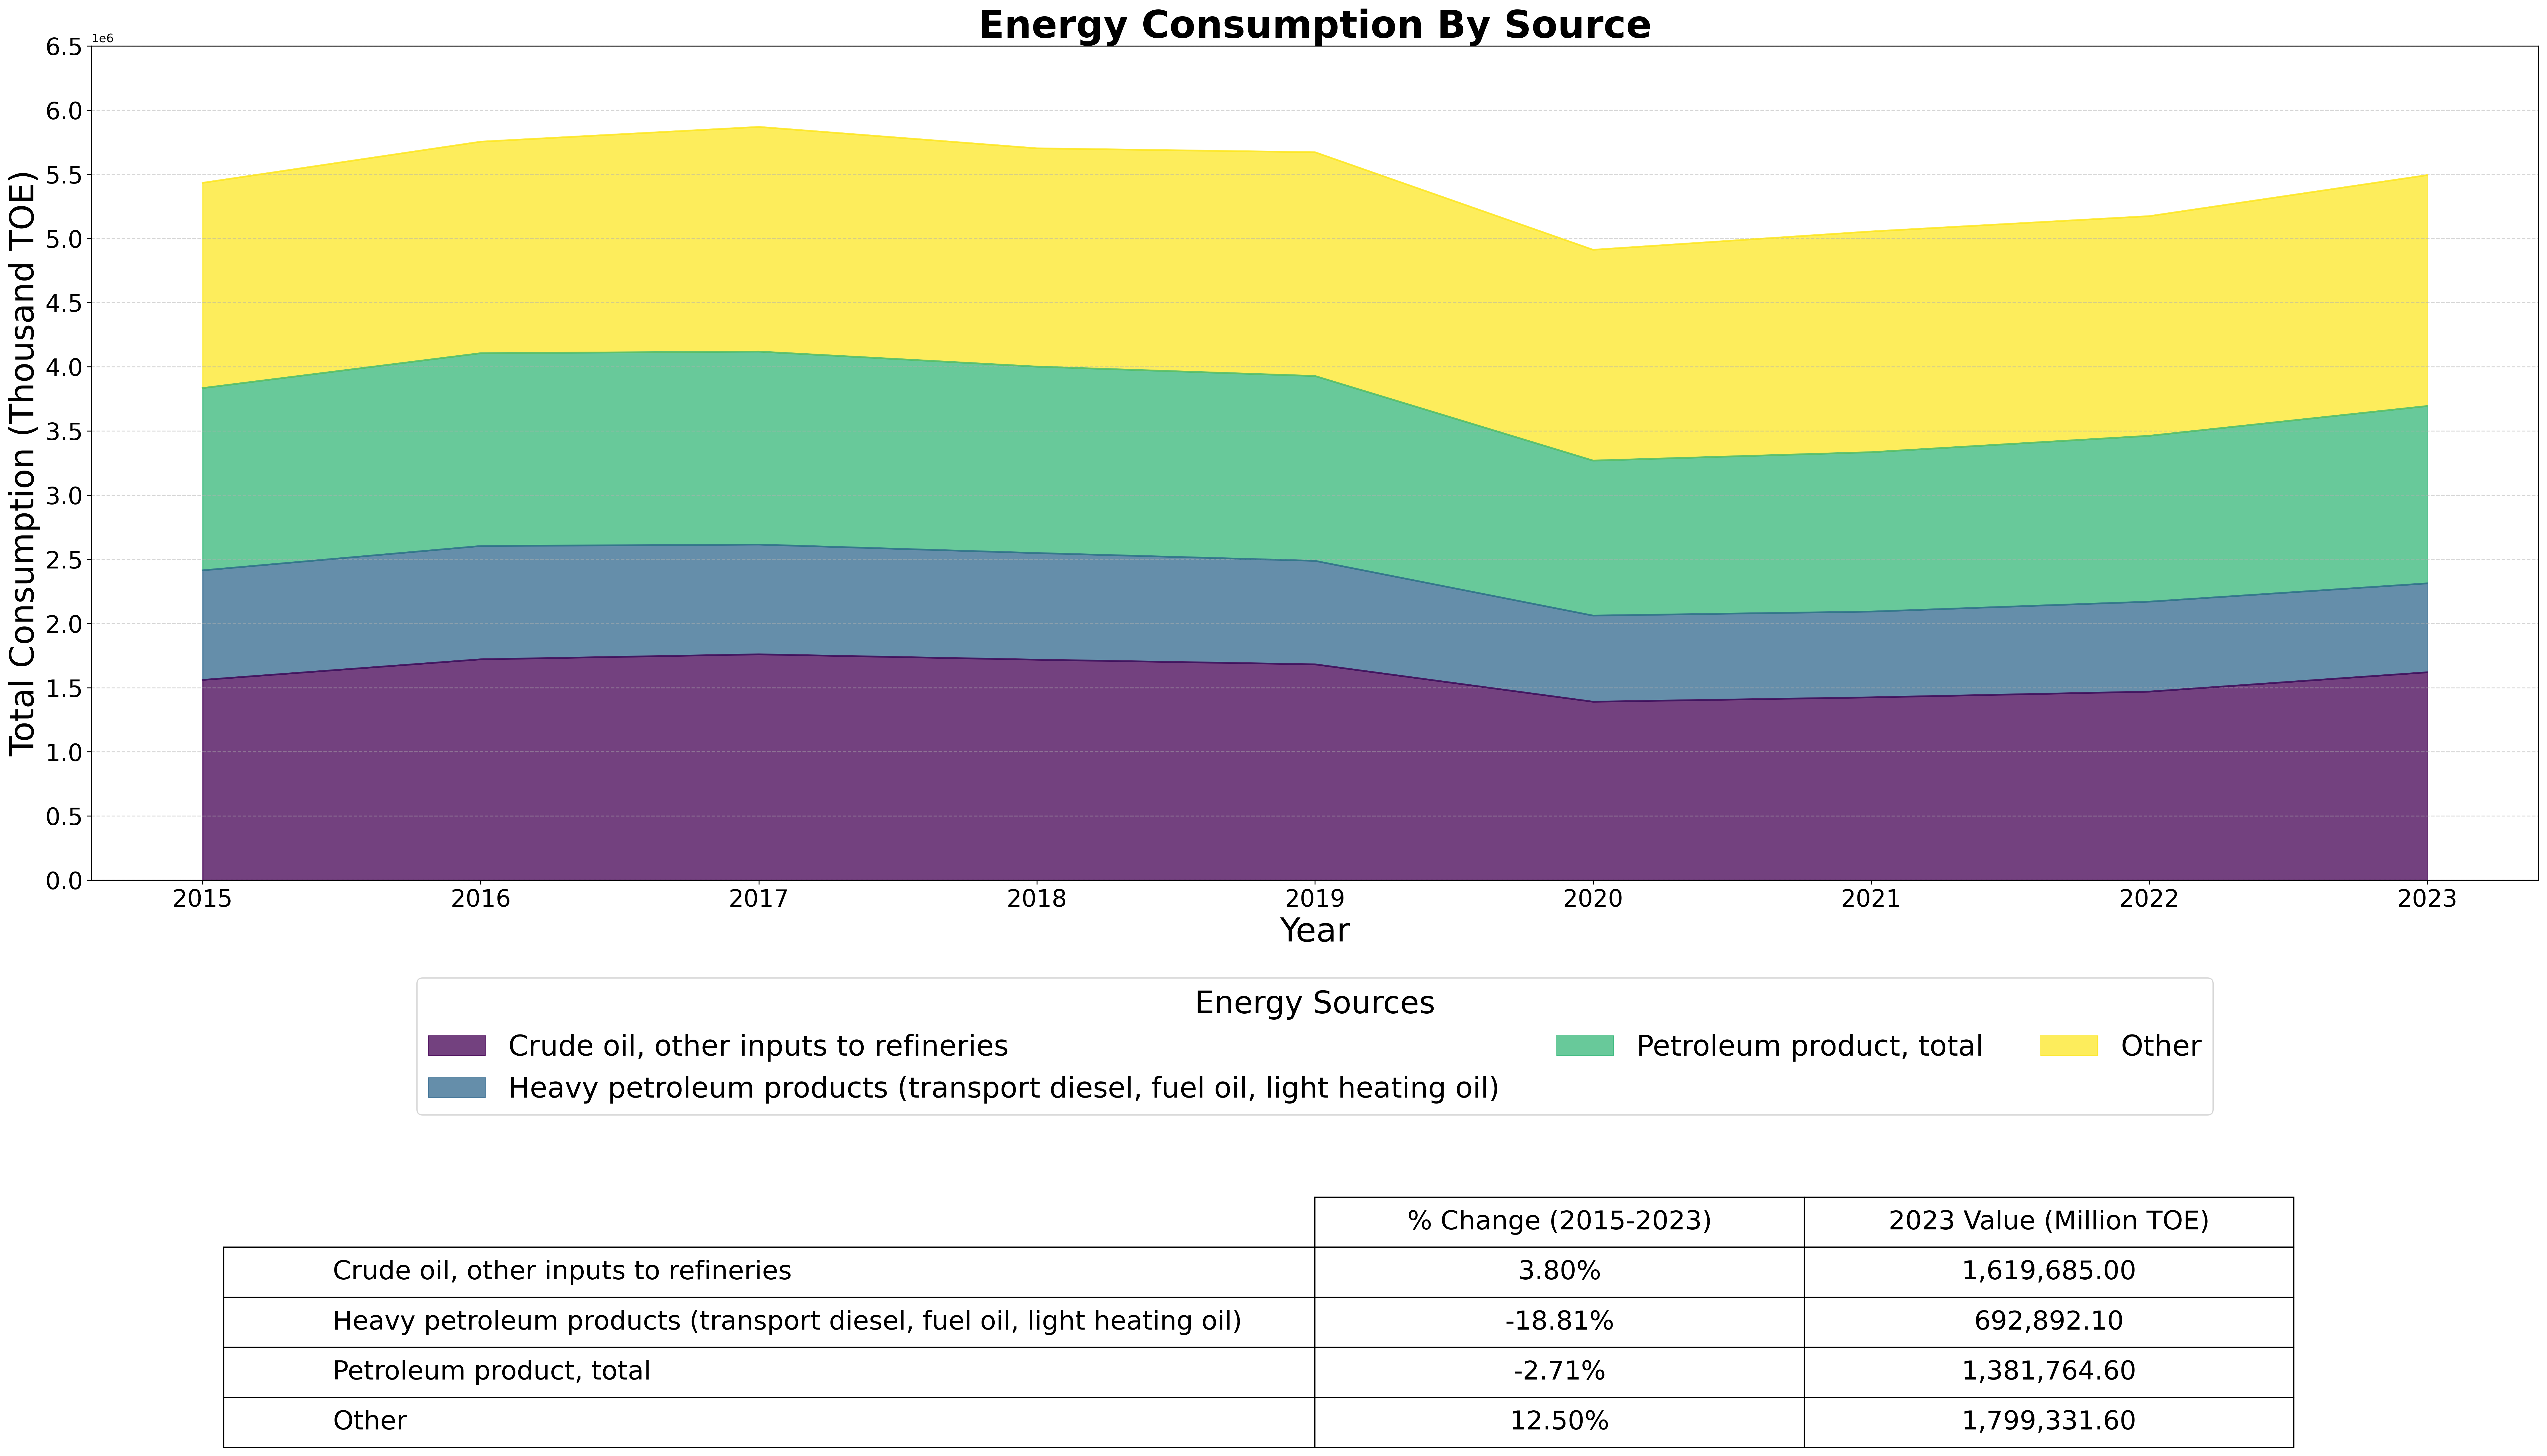

In [31]:
energy_consumption = pd.read_csv('energy_consumption_cleaned.csv')
energy_consumption= energy_consumption[energy_consumption['time'] >= 2015]

data_pivot = energy_consumption.pivot_table(
    index='time', 
    columns='energy_source', 
    values='total_consumption', 
    aggfunc='sum'
)
total_consumption_per_year = data_pivot.sum(axis=1)
percentage_data = data_pivot.div(total_consumption_per_year, axis=0) * 100
other_sources = percentage_data.columns[percentage_data.mean(axis=0) < 5] 
data_pivot['Other'] = data_pivot[other_sources].sum(axis=1)  
data_pivot = data_pivot.drop(columns=other_sources)  
data_pivot = data_pivot.drop(columns=["Total"])

percentage_change = ((data_pivot.loc[2023] - data_pivot.loc[2015]) / data_pivot.loc[2015]) * 100
current_values = data_pivot.loc[2023]

table_data = []
for source in data_pivot.columns:
    table_data.append([f"{percentage_change[source]:.2f}%", f"{current_values[source]:,.2f}"])

plt.figure(figsize=(30, 22), dpi=300)
ax = data_pivot.plot(kind='area', alpha=0.75, ax=plt.gca(), colormap='viridis')

plt.xticks(fontsize=20)
plt.yticks(np.arange(0, 7000000, 500000),fontsize=20)
plt.title(f"Energy Consumption By Source", fontsize=32, weight='bold')
plt.xlabel("Year", fontsize=28)
plt.ylabel("Total Consumption (Thousand TOE)", fontsize=28)
plt.legend(
    title="Energy Sources", 
    fontsize=24, 
    title_fontsize=26, 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.1),
    ncol=3
)
column_labels = ["% Change (2015-2023)", "2023 Value (Million TOE)"]
table = plt.table(cellText=table_data, colLabels=column_labels, rowLabels=data_pivot.columns, 
                  loc='bottom', cellLoc='center', bbox=[0.5, -0.68, 0.4, 0.3])
table.set_fontsize(22)
table.scale(1.2, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### Description: This chart presents energy consumption by source from 2015 to 2023, categorised into crude oil, petroleum products, heavy petroleum products, and other sources.
##### The table highlights a 12.5% increase in 'Other' energy sources and an 18.81% decline in heavy petroleum products over the period, with crude oil showing a low 3.8% growth.
#### Conclusion: Energy consumption trends indicate a gradual shift away from heavy petroleum products in favor of diversified energy sources, including a significant rise in the "Other" category, which may indicate an increased adoption of alternative energy forms.

### Datasets Nr. 3 - Energy consumption overview

##### *The SQL code used to create the dataset of renewable share is displayed bellow.*

In [ ]:
# CREATE TABLE renewable_energy_consumption AS
# SELECT 
#     time,
#     SUM(value) AS total_consumption
# FROM 
#     clean_energy_data
# WHERE 
#     LOWER(indicator) LIKE '%final consumption of renewables%'
#     AND value IS NOT NULL
# GROUP BY 
#     time
# ORDER BY 
#     time;
# SELECT 'time', 'total_consumption'
# UNION ALL
# SELECT time, total_consumption
# FROM renewable_energy_consumption
# INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/renewable_energy_consumption.csv'
# FIELDS TERMINATED BY ',' 
# ENCLOSED BY '"'
# LINES TERMINATED BY '\n';

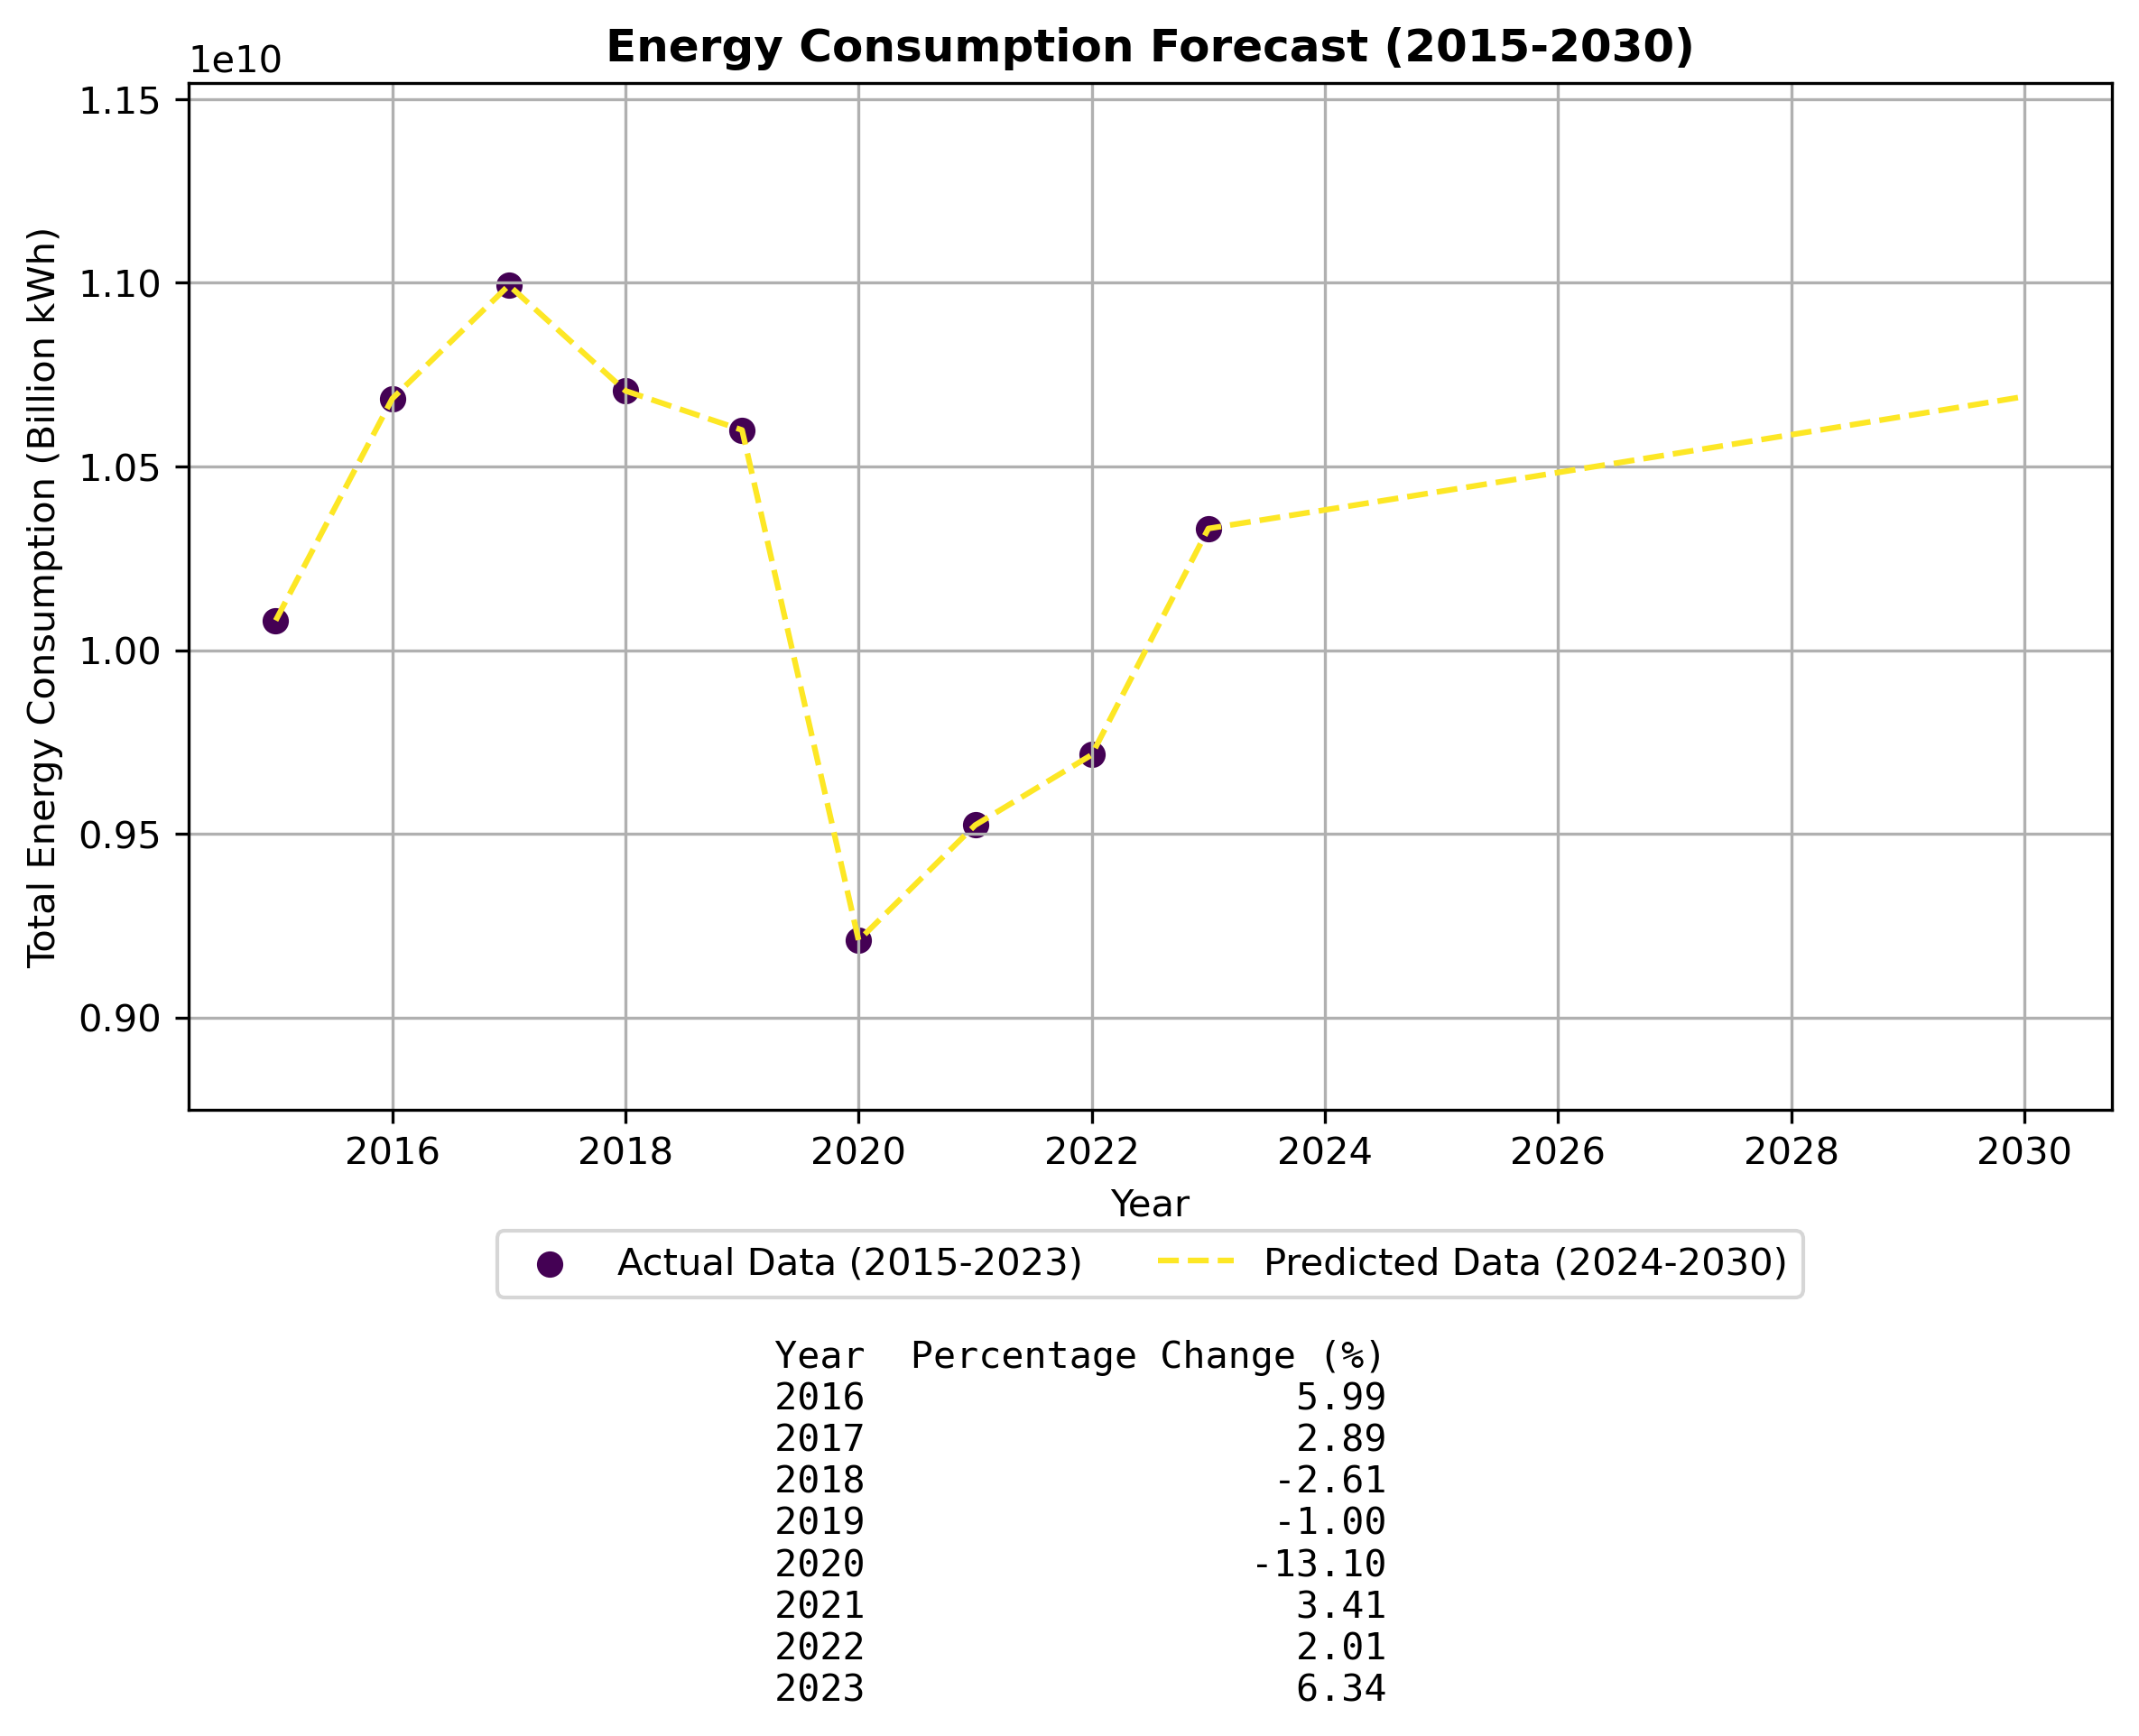

Average Historical Growth Rate: 0.49%


In [36]:
renewables_share_recent = renewables_share[renewables_share['time'] >= 2015]
years_recent = renewables_share_recent['time'].values
total_consumption_recent = renewables_share_recent['total_consumption'].values

actual_data = pd.DataFrame({
    "Year": years_recent,
    "Total Consumption": total_consumption_recent})

actual_data["Percentage Change (%)"] = actual_data["Total Consumption"].pct_change() * 100
historical_percentage_changes = actual_data["Percentage Change (%)"].dropna() 
average_growth_rate = historical_percentage_changes.mean() / 100  

last_actual_consumption = total_consumption_recent[-1]
predicted_years = np.arange(2024, 2031)
predicted_consumption = last_actual_consumption * (1 + average_growth_rate) ** (predicted_years - 2023)

combined_years = np.concatenate([years_recent, predicted_years])
combined_consumption = np.concatenate([total_consumption_recent, predicted_consumption])

plt.figure(figsize=(8, 5), dpi=300)

viridis = plt.colormaps['viridis']
color_values = np.linspace(0, 1, 2)  
colors = [viridis(val) for val in color_values]

plt.scatter(years_recent, total_consumption_recent, color=colors[0], label='Actual Data (2015-2023)', marker='o')
plt.plot(combined_years, combined_consumption, color=colors[1], linestyle='--', label='Predicted Data (2024-2030)')

plt.title('Energy Consumption Forecast (2015-2030)',weight='bold')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (Billion kWh)')
plt.ylim(min(combined_consumption) * 0.95, max(combined_consumption) * 1.05)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)


table_data = actual_data[["Year", "Percentage Change (%)"]].dropna()  
table_text = table_data.to_string(index=False, header=True, float_format="{:.2f}".format)

plt.gcf().text(0.5, 0, table_text, fontsize=10, va="top", ha="center", family="monospace")
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Average Historical Growth Rate: {average_growth_rate:.2%}")


##### Description: This chart shows the total energy consumption in Lithuania from 2015 to 2023 (actual data) and provides a forecast for 2024 to 2030. 
##### The table highlights year-over-year percentage changes, with the most notable drop of -13.1% in 2020 and a recovery trend starting in 2021.
#### Conclusion: The forecast predicts a gradual increase in total consumption, with an average historical growth rate of 0.49%. Energy consumption is expected to stabilize and grow moderately in the coming years following a recovery from the 2020 fall. The forecast reflects a steady upward trend, likely influenced by economic recovery and gradual increases in energy demand.


# Final Conclusions from Second Analysis

### The analysis of Lithuania's energy consumption trends from 2010 to 2023 highlights significant shifts:
- Total consumption declined by 20.5% from its 2021 peak, driven by energy efficiency and changing industrial activity.
- Space heating dominates, but increases in lighting (12.81%) and water heating (13.82%) show evolving usage patterns, with total household consumption rising just 2.34% due to efficiency improvements.
- Heavy petroleum product use dropped (-18.81%), while "Other" sources grew (12.5%), signaling diversification in energy sources.
- Energy consumption is stabilising, with moderate growth predicted post-2023, following the 2020 dip (-13.1%).

#### The hypothesis that "Energy consumption in Lithuania is decreasing due to energy efficiency and changing consumption patterns" is accepted, supported by declining electricity and heavy petroleum consumption, alongside efficiency-driven stabilisation. These trends reflect progress toward a sustainable energy future. through more efficient energy use, a decreasing reliance on heavy petroleum products, and shifts in household consumption patterns. This transition positions Lithuania for a more sustainable energy future.

# Third Analysis: Comparing energy balance between EU members 

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

energy = pd.read_csv('electricityEU.csv')

energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Entity                                                27 non-null     object 
 1   Coal - % electricity                                  27 non-null     float64
 2   Gas - % electricity                                   27 non-null     float64
 3   Hydro - % electricity                                 27 non-null     float64
 4   Solar - % electricity                                 27 non-null     float64
 5   Wind - % electricity                                  27 non-null     float64
 6   Oil - % electricity                                   27 non-null     float64
 7   Nuclear - % electricity                               27 non-null     float64
 8   Other renewables excluding bioenergy - % electricity  27 non-n

##### For this analysis we used data from Our World in Data website on electricity production sources. Dataset: https://ourworldindata.org/electricity-mix

### 1 Hypothesis: Lithuania produces a significantly bigger share of electricity from wind power than other EU members

### 2 Hypothesis: EU members on average produce a bigger share of electricity from renewables than all other sources

#### To test these hypotheses we will use Python and it's modules: NumPy, Pandas, Matplotlib and Seaborn. Aside from these modules, we will also be using a self-taught module SciPy for statistical analysis. 

#### In the cell below we firstly transpose the data set, because it might be easier to read.

In [10]:
energt = energy.set_index('Entity').T
energt.head()

Entity,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden
Coal - % electricity,0.089606,0.060680,28.907225,7.974011,0.000000,40.207405,7.939340,0.000000,1.978958,0.420144,...,0.000000,0.000000,6.917724,61.048890,0.000000,14.392325,4.556193,20.959263,1.445783,0.006011
Gas - % electricity,10.707886,20.873787,3.900975,22.031897,0.000000,3.111052,2.527505,0.771605,0.663828,6.113478,...,2.631579,77.821014,37.740482,8.740741,24.242424,14.765460,8.032400,2.825230,23.443930,0.090166
Hydro - % electricity,59.423540,0.461165,7.776944,46.485527,0.000000,3.071672,0.029735,0.308642,18.925352,10.346035,...,6.140351,0.000000,0.049120,1.410370,24.465240,32.515990,15.626055,32.588700,7.417980,39.715076
Solar - % electricity,7.706093,9.296116,8.802200,1.122268,15.213359,4.003675,9.277431,11.882716,0.814128,4.524324,...,24.561403,20.622566,17.314777,7.253334,10.182710,3.695807,2.058724,4.533508,16.711771,1.490743
Wind - % electricity,12.022103,18.531553,3.875969,14.884820,3.896104,0.945130,57.716324,11.574074,18.324150,9.455175,...,42.982456,0.000000,23.716742,13.665185,29.478610,13.361763,0.000000,0.065703,23.773863,20.870401


#### Here we will erase the ' - % electricity' from all rows, as at this point it's no longer useful for understanding anything and it just takes up space. 

In [13]:
new_index = []
for label in energt.index:
    new_label = label.replace(' - % electricity', '')
    new_index.append(new_label)
energt.index = new_index
energt

Entity,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,...,Luxembourg,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden
Coal,0.089606,0.060680,28.907225,7.974011,0.000000,40.207405,7.939340,0.000000,1.978958,0.420144,...,0.000000,0.000000,6.917724,61.048890,0.000000,14.392325,4.556193,20.959263,1.445783,0.006011
Gas,10.707886,20.873787,3.900975,22.031897,0.000000,3.111052,2.527505,0.771605,0.663828,6.113478,...,2.631579,77.821014,37.740482,8.740741,24.242424,14.765460,8.032400,2.825230,23.443930,0.090166
Hydro,59.423540,0.461165,7.776944,46.485527,0.000000,3.071672,0.029735,0.308642,18.925352,10.346035,...,6.140351,0.000000,0.049120,1.410370,24.465240,32.515990,15.626055,32.588700,7.417980,39.715076
Solar,7.706093,9.296116,8.802200,1.122268,15.213359,4.003675,9.277431,11.882716,0.814128,4.524324,...,24.561403,20.622566,17.314777,7.253334,10.182710,3.695807,2.058724,4.533508,16.711771,1.490743
Wind,12.022103,18.531553,3.875969,14.884820,3.896104,0.945130,57.716324,11.574074,18.324150,9.455175,...,42.982456,0.000000,23.716742,13.665185,29.478610,13.361763,0.000000,0.065703,23.773863,20.870401
Oil,4.719235,5.449028,0.875219,1.004135,79.777374,1.903387,1.932798,54.938270,2.943387,1.888701,...,5.263158,1.167315,4.232501,3.063704,2.941176,0.586354,2.598718,0.394218,3.977757,1.653042
Nuclear,0.000000,40.558250,40.410100,0.000000,0.000000,39.905487,0.000000,0.000000,42.484970,65.287590,...,0.000000,0.000000,3.274662,0.000000,0.000000,19.864962,61.896730,37.056503,21.056534,29.093533
Other renewables excluding bioenergy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116707,...,0.000000,0.000000,0.000000,0.000000,0.423351,0.000000,0.033750,0.000000,0.000000,0.000000
Bioenergy,5.331541,4.769417,5.451363,6.497342,1.113172,6.852192,20.576866,20.524690,13.865232,1.847854,...,18.421053,0.389105,6.753991,4.817778,8.266488,0.817342,5.197435,1.576872,2.172382,7.081029


#### To start the analysis, we have to get a clearer picture of how much of each energy fuel do EU members produce. To do that we will firstly create a new DataFrame called 'plot_data', which contains information about the mean production share of all sources of energy in EU countries, how many countries actually produce it and the type of energy associated with these numbers. 

In [16]:
mean_electricity = energt.mean(axis=1)

country_count = (energt > 0).sum(axis=1)

plot_data = pd.DataFrame({
    'Mean Electricity Production (%)': mean_electricity,
    'Number of Countries Producing': country_count,
    'Energy Source': mean_electricity.index
})

plot_data

,Mean Electricity Production (%),Number of Countries Producing,Energy Source
Coal,9.257826,20,Coal
Gas,17.356177,26,Gas
Hydro,15.021530,25,Hydro
Solar,9.502699,27,Solar
Wind,17.206311,25,Wind
Oil,7.991666,26,Oil
Nuclear,16.558963,13,Nuclear
Other renewables excluding bioenergy,0.103615,5,Other renewables excluding bioenergy
Bioenergy,7.001215,27,Bioenergy


#### Now we want to plot the data. Since we have 3 variables that we will check, using a scatterplot with x-axis as the fuel type, the y axis as the number of producing countries and the bubble size as the mean share of production in producing countries.

C:\Users\Danielius\AppData\Local\Temp\ipykernel_6580\3384963747.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


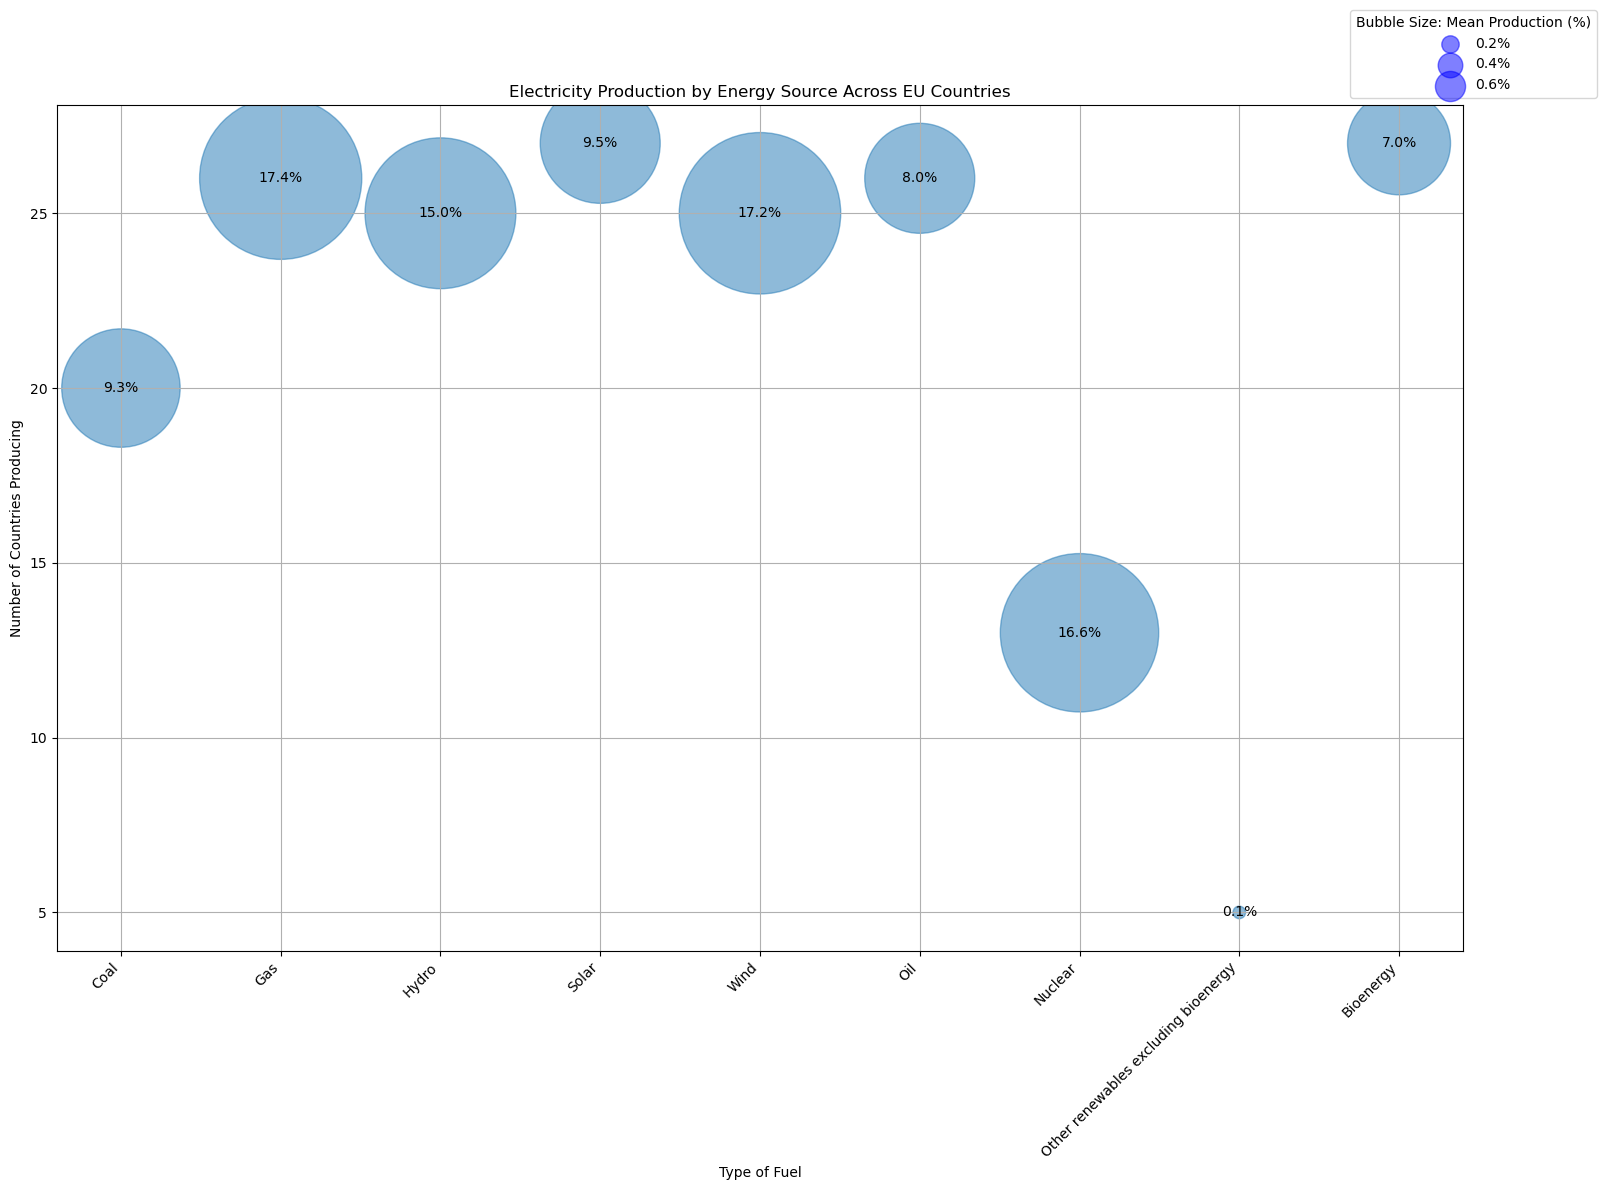

In [19]:
plt.figure(figsize=(16, 12))

plot_data['Energy Source'] = pd.Categorical(plot_data['Energy Source'], categories=plot_data['Energy Source'], ordered=True)

scatter = plt.scatter(
    x=plot_data['Energy Source'],
    y=plot_data['Number of Countries Producing'],
    s=np.pi * (plot_data['Mean Electricity Production (%)'] * 250),  
    alpha=0.5,
    cmap='viridis'
)

plt.title('Electricity Production by Energy Source Across EU Countries')
plt.xlabel('Type of Fuel')
plt.ylabel('Number of Countries Producing')

plt.xticks(rotation=45, ha='right')

for index, row in plot_data.iterrows():
    plt.text(row['Energy Source'], row['Number of Countries Producing'], f"{row['Mean Electricity Production (%)']:.1f}%",
             color='black', ha='center', va='center')

legend_sizes = [2, 4, 6]  
legend_labels = [f'{(size/10):.1f}%' for size in legend_sizes]  

for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], s=np.pi * (size * 25), color='blue', alpha=0.5, label=label)

plt.legend(title='Bubble Size: Mean Production (%)', loc='lower right', bbox_to_anchor=(1.1, 1), scatterpoints=1, frameon=True)

plt.grid(True)
plt.tight_layout()

plt.show()

#### Now that we've established the bigger picture of the production of various energy sources in the EU, we can rank EU members based on wind production share in descending order, to see how Lithuania ranks compared to others. 

In [22]:
wind = energt.loc['Wind']
swind = wind.sort_values(ascending=False)
swind.head(10)

Entity
Denmark        57.716324
Lithuania      45.503597
Luxembourg     42.982456
Ireland        35.762010
Portugal       29.478610
Germany        27.197447
Spain          23.773863
Netherlands    23.716742
Greece         22.093966
Sweden         20.870401
Name: Wind, dtype: float64

#### Lithuania seems to be second in terms of producing it's share of energy from wind, which is a good indicator for our hypothesis. It's also important to see the normality of our data, which we will do using the shapiro normality test. 

In [25]:
from scipy.stats import ttest_1samp, shapiro

shapiro_stat, shapiro_p = shapiro(wind)
print(f'Shapiro statistic: {shapiro_stat}, Shapiro p-value: {shapiro_p}')

Shapiro statistic: 0.9103911589483503, Shapiro p-value: 0.02330937271248001


#### The test indicates non-normal data distribution, so now we have to visually understand what's happening. We'll use a histogram to understand the distribution. 

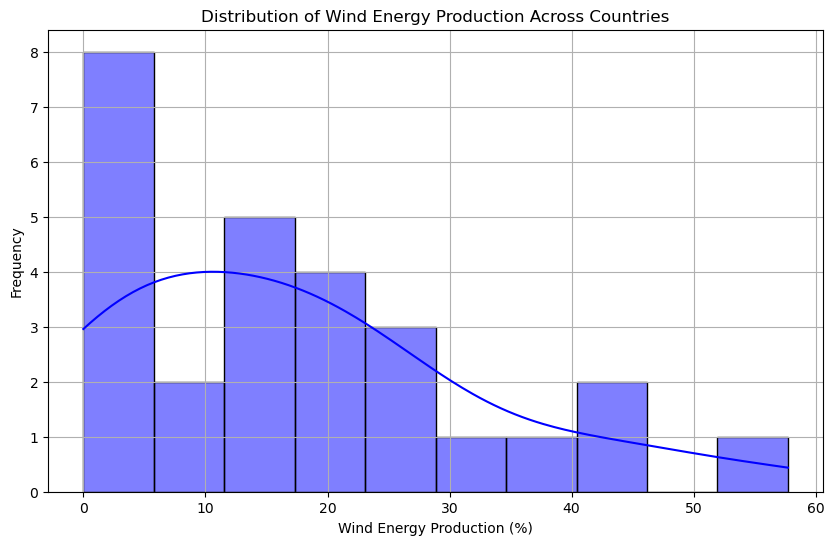

In [28]:
plt.figure(figsize=(10, 6)) 

sns.histplot(wind, kde=True, color='blue', bins=10)  

plt.title('Distribution of Wind Energy Production Across Countries')
plt.xlabel('Wind Energy Production (%)')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

#### The distribution shows a right-skew, indicating that most countries don't rely on wind energy production, but there are a few outliers that significantly rely on wind energy. Given that Lithuania is among these outliers, this preliminary analysis supports our hypothesis, so let's jump to the t-test to confirm our assumptions. 

In [31]:
ltu_wind = wind['Lithuania']
eu_wind = wind.drop('Lithuania')
t_stat, p_value = ttest_1samp(eu_wind, ltu_wind)
print(f'T statistic: {t_stat}, p-value: {p_value}')

T statistic: -10.461303544206002, p-value: 1.28052686033698e-10


#### Let's interpret the results: 
##### the p-value seems to be very small, indicating that we can reject the null (H0: There's no statistical difference between EU member and Lithuania's production of wind energy) and come to the conclusion that Lithuania actually produces a significantly larger share of it's electricity from wind energy when compared to EU members. (Note, that the t-statistic is negative, because the first group is EU countries, which have a smaller mean than Lithuania). 
#### From this we can move to our second hypothesis and discover if EU members are more reliant on renewables than all other sources of electricity. Firstly, let's define which sources fall into each category.

In [34]:
renew_energies = ['Hydro', 'Wind', 'Solar', 'Bioenergy', 'Other renewables excluding bioenergy']
nonrenew_energies = ['Coal', 'Gas', 'Oil', 'Nuclear']
energtt = energt
def agr_energies(df, renew, nonrenew):
    df = df.T
    df['Total Renewable'] = df[renew].sum(axis=1)
    df['Total Non-Renewable'] = df[nonrenew].sum(axis=1)
    return df

energt_updated = agr_energies(energtt, renew_energies, nonrenew_energies)
energt_updated

,Coal,Gas,Hydro,Solar,Wind,Oil,Nuclear,Other renewables excluding bioenergy,Bioenergy,Total Renewable,Total Non-Renewable
Entity,,,,,,,,,,,
Austria,0.089606,10.707886,59.423540,7.706093,12.022103,4.719235,0.000000,0.000000,5.331541,84.483277,15.516727
Belgium,0.060680,20.873787,0.461165,9.296116,18.531553,5.449028,40.558250,0.000000,4.769417,33.058251,66.941745
Bulgaria,28.907225,3.900975,7.776944,8.802200,3.875969,0.875219,40.410100,0.000000,5.451363,25.906475,74.093519
Croatia,7.974011,22.031897,46.485527,1.122268,14.884820,1.004135,0.000000,0.000000,6.497342,68.989957,31.010042
Cyprus,0.000000,0.000000,0.000000,15.213359,3.896104,79.777374,0.000000,0.000000,1.113172,20.222636,79.777374
Czechia,40.207405,3.111052,3.071672,4.003675,0.945130,1.903387,39.905487,0.000000,6.852192,14.872670,85.127331
Denmark,7.939340,2.527505,0.029735,9.277431,57.716324,1.932798,0.000000,0.000000,20.576866,87.600356,12.399643
Estonia,0.000000,0.771605,0.308642,11.882716,11.574074,54.938270,0.000000,0.000000,20.524690,44.290122,55.709875
Finland,1.978958,0.663828,18.925352,0.814128,18.324150,2.943387,42.484970,0.000000,13.865232,51.928862,48.071142


#### Now that we have the shares of electricity produced by each consolidated type of fuel, we can analyse which type is produced more in EU countries. 

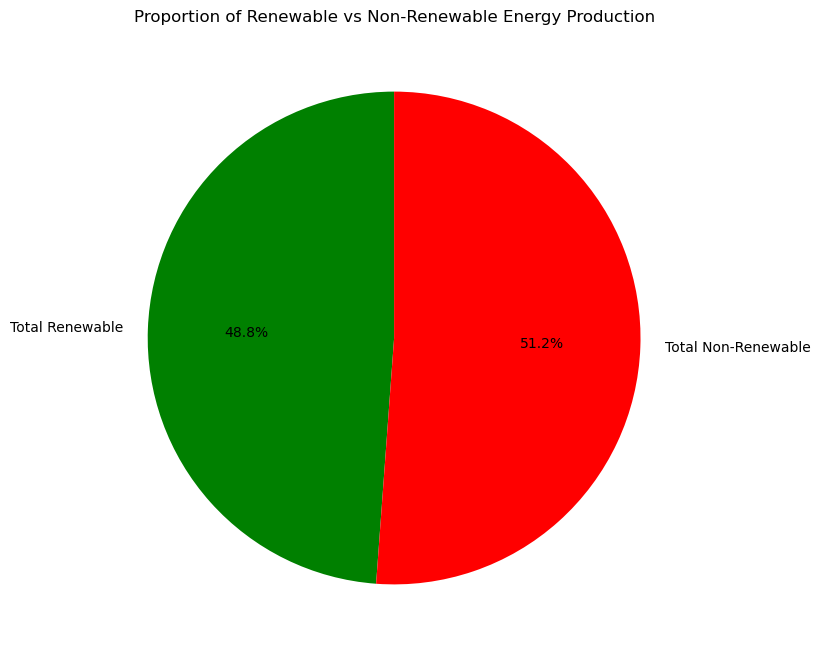

In [37]:
total_renewable = energt_updated['Total Renewable'].sum()
total_non_renewable = energt_updated['Total Non-Renewable'].sum()

totals = [total_renewable, total_non_renewable]
labels = ['Total Renewable', 'Total Non-Renewable']
colors = ['green', 'red']  
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Renewable vs Non-Renewable Energy Production')
plt.show()

#### From the pie chart we can see, that renewables stand behind other sources, thus we reject our second hypothesis (EU members are more reliant on renewable electricity production than non-renewable). Last thing to do is make this dataset accessible to other group members if needed for further analysis. We will use sqlite3 for simplicity and accesibility. 

In [40]:
import sqlite3

conn = sqlite3.connect('energy_data.db')

energt_updated.to_sql('energy_production', conn, if_exists='replace', index=True, index_label='Country')

conn.close()

In [42]:
conn = sqlite3.connect('energy_data.db')

query_result = pd.read_sql('SELECT * FROM energy_production', conn)

print(query_result.head())

conn.close()

    Country       Coal        Gas      Hydro      Solar       Wind        Oil  \
0   Austria   0.089606  10.707886  59.423540   7.706093  12.022103   4.719235   
1   Belgium   0.060680  20.873787   0.461165   9.296116  18.531553   5.449028   
2  Bulgaria  28.907225   3.900975   7.776944   8.802200   3.875969   0.875219   
3   Croatia   7.974011  22.031897  46.485527   1.122268  14.884820   1.004135   
4    Cyprus   0.000000   0.000000   0.000000  15.213359   3.896104  79.777374   

    Nuclear  Other renewables excluding bioenergy  Bioenergy  Total Renewable  \
0   0.00000                                   0.0   5.331541        84.483277   
1  40.55825                                   0.0   4.769417        33.058251   
2  40.41010                                   0.0   5.451363        25.906475   
3   0.00000                                   0.0   6.497342        68.989957   
4   0.00000                                   0.0   1.113172        20.222636   

   Total Non-Renewable  
0

### Conclusions 
#### -Lithuania produces a significantly larger share of it's electricity from wind turbines when compared to it's EU counterparts. 
#### -EU is still producing most of it's electricity from non-renewable energy sources, rather than renewables. 

### Summary: 
#### In this analysis we compared Lithuania to other EU members in terms of electricity production and also assessed EU energy production balance. 

### Bibliography: 
#### Ritchie, H., Rosado, P., & Roser, M. (2024, January 4). Electricity mix. Our World in Data. https://ourworldindata.org/electricity-mix

## Fourth Analysis: Existing Wind Power Infrastructure

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Hypothesis: The potential for wind power generation in Lithuania is not fully utilized, with some regions having stronger wind resources that could help boost the country's energy independence

### Objectives:

1. Evaluate Wind Farm Distribution
2. Compare Wind Resource Potential
3. Estimate Potential Wind Power Generation
5. Assess Regional Differences

## Dataset about wind farms

In [13]:
df = pd.read_excel("/Users/mortaaleksiejunaite/Downloads/lithuania_wind_farms.xlsx")
df

,Name,Total Power (kW),Number of Wind Farms,Number of Turbines
0,Unclassified,7885,28,31
1,Akmenes,75000,1,14
2,Alytaus,6000,1,3
3,Birzai,66000,1,3
4,Kaunas,80775,5,4
5,Klaipeda,288370,13,106
6,Offshore,2400000,1,106
7,Panevezys,250,1,1
8,Sakiai,33000,1,8
9,Siauliai,21000,3,8


## Data Source

For this analysis, we retrieved data from **Wind Energy Market Intelligence**. The dataset contains a total of 15 rows and 4 columns. We later filtered out the necessary data for this analysis. 

The source of the data can be accessed at the following link: [Wind Energy Market Intelligence - Lithuania](https://www.thewindpower.net/country_zones_en_43_lithuania.php).

In [78]:
df_f = df[(df['Name'].str.strip() != 'Unclassified') & (df['Name'].str.strip() != 'Offshore')] 
df_f = df_f.rename(columns={'Name': 'Region'})  
df_f

,Region,Total Power (kW),Number of Wind Farms,Number of Turbines
1,Akmenes,75000,1,14
2,Alytaus,6000,1,3
3,Birzai,66000,1,3
4,Kaunas,80775,5,4
5,Klaipeda,288370,13,106
7,Panevezys,250,1,1
8,Sakiai,33000,1,8
9,Siauliai,21000,3,8
10,Taurage,282325,12,116
11,Telsiai,241000,6,34


#### *User-defined function to calculate total power generation per region*

In [42]:
def calculate_total_power(df):
    """
    This function calculates the total power generation for each region
    by summing up the total power for all wind farms in that region.
    """
    total_power = df_f.groupby('Region')['Total Power (kW)'].sum().reset_index()
    return total_power
wind_farm_total_power = calculate_total_power(df)
print(wind_farm_total_power)

       Region  Total Power (kW)
0     Akmenes             75000
1     Alytaus              6000
2      Birzai             66000
3      Kaunas             80775
4    Klaipeda            288370
5   Panevezys               250
6      Sakiai             33000
7    Siauliai             21000
8     Taurage            282325
9     Telsiai            241000
10      Utena             58400


#### *Total Power Generation by Region*

<Figure size 1000x600 with 0 Axes>

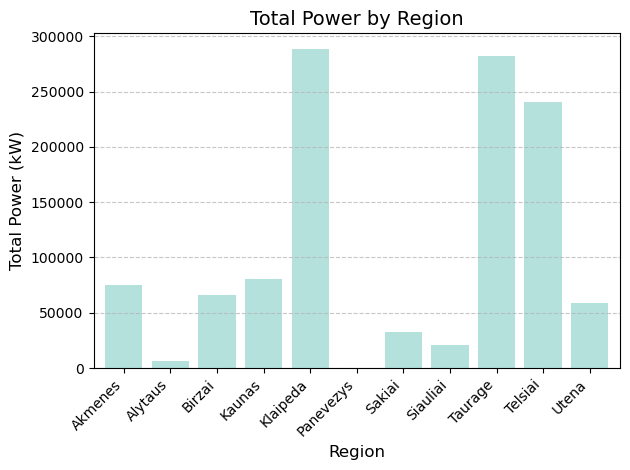

In [47]:
plt.figure(figsize=(10, 6))

wind_farm_total_power.plot.bar(x='Region', y='Total Power (kW)', color='#B5E1DC', legend=False, width=0.8)

# Customizing the plot with grid lines, title, and axis labels
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Power (kW)', fontsize=12)
plt.title('Total Power by Region', fontsize=14)

# Rotate region names for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### This bar chart shows the total power generation by region in Lithuania. Klaipėda and Tauragė stand out with significantly higher power outputs compared to other regions, indicating they have the most substantial wind power infrastructure. Other regions, like Panevėžys and Utena, produce much less power, highlighting potential areas for growth in wind energy capacity.

## 2. Compare Wind Resource Potential

In [54]:
df_s = pd.read_excel("/Users/mortaaleksiejunaite/Downloads/Average_wind_speed.xlsx", usecols=[1, 2, 3])
print(df_s.head(10).to_string(index=False))

  City   Period  Wind Speed (m/s)
Alytus Period 1              7.75
Alytus Period 2              7.57
Alytus Period 3              7.41
Alytus Period 4              7.26
Alytus Period 5              6.98
Kaunas Period 1              7.63
Kaunas Period 2              7.51
Kaunas Period 3              7.40
Kaunas Period 4              7.32
Kaunas Period 5              7.20


## Data Source

For this analysis, we retrieved data from **Global Wind Atlas**. The dataset contains a total of 15 rows and 4 columns. We later filtered out the necessary data for this analysis. 

The source of the data can be accessed at the following link: [https://globalwindatlas.info/en/area/Lithuania).

#### *Average Wind Speed by City*

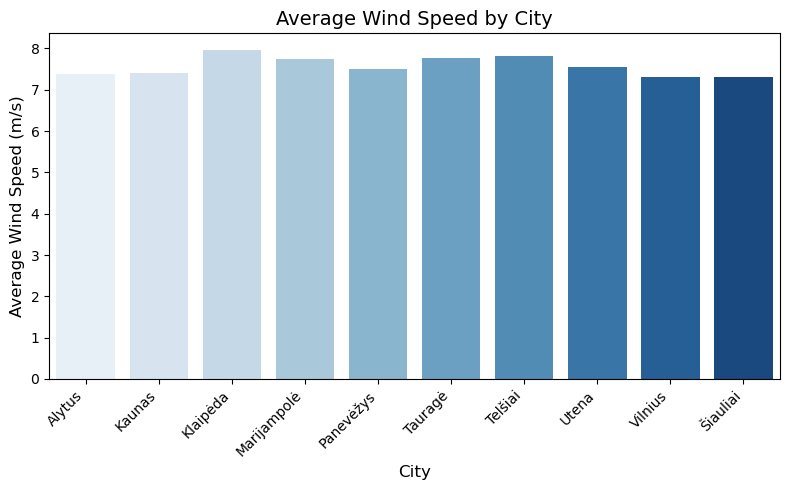

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_s = pd.read_excel("/Users/mortaaleksiejunaite/Downloads/Average_wind_speed.xlsx", usecols=[1, 2, 3])

# Clean 'City' column (if necessary)
df_s['City'] = df_s['City'].str.strip().str.capitalize()


city_wind_speeds = {}
for city in df_s['City'].unique():
    # Filter the data for each city
    city_data = df_s[df_s['City'] == city]
    
  
    avg_wind_speed = city_data['Wind Speed (m/s)'].mean()
    city_wind_speeds[city] = avg_wind_speed


wind_speed_df = pd.DataFrame(list(city_wind_speeds.items()), columns=['City', 'Average Wind Speed (m/s)'])


plt.figure(figsize=(8, 5))
sns.barplot(x='City', y='Average Wind Speed (m/s)', data=wind_speed_df, hue='City', palette='Blues', legend=False)


plt.title('Average Wind Speed by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Wind Speed (m/s)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability

plt.tight_layout()
plt.show() 

#### The bar chart shows that most cities in Lithuania have similar average wind speeds, with slight variations. Klaipėda, Tauragė, and Šiauliai stand out with higher wind speeds, suggesting they may be better suited for wind energy generation.

## 3. Estimate Potential Wind Power Generation

In [66]:
def estimate_potential_power(df_s, C=0.5):
    # Calculate the estimated power for each city
    df_s['Estimated Power (kW)'] = df_s['Wind Speed (m/s)'] ** 3 * C
    return df_s

# Apply the function to estimate power
df_s = estimate_potential_power(df_s)

# Get top 10 cities by estimated power, ensuring there are no duplicates
top_10_power = df_s[['City', 'Estimated Power (kW)']].sort_values(by='Estimated Power (kW)', ascending=False).drop_duplicates('City').head(10)

# Reset index and make the index start from 1
top_10_power.reset_index(drop=True, inplace=True)
top_10_power.index = top_10_power.index + 1

# Display the result
print(top_10_power)

           City  Estimated Power (kW)
1      Klaipėda            310.325238
2       Tauragė            268.683899
3       Telšiai            264.737564
4   Marijampolė            257.924804
5         Utena            234.548716
6        Alytus            232.742188
7     Panevėžys            230.944959
8        Kaunas            222.097473
9      Šiauliai            216.899047
10      Vilnius            216.899047


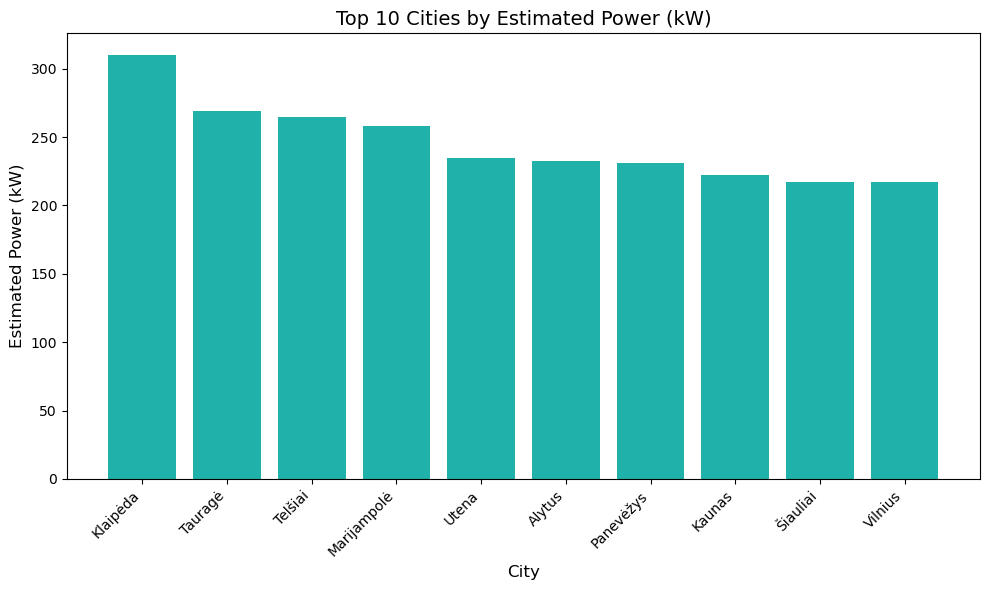

In [68]:
top_10_power = top_10_power.drop_duplicates(subset='City', keep='first')

plt.figure(figsize=(10, 6))
plt.bar(top_10_power['City'], top_10_power['Estimated Power (kW)'], color= 'lightseagreen')

plt.title('Top 10 Cities by Estimated Power (kW)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Estimated Power (kW)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### This bar chart shows the top 10 cities in Lithuania by estimated wind power (kW). Klaipėda and Tauragė stand out with significantly higher estimated power, while the other cities, including Utena, Alytus, and Vilnius, have more similar levels of estimated wind power. This suggests that Klaipėda and Tauragė may have the highest potential for wind energy generation in the country.

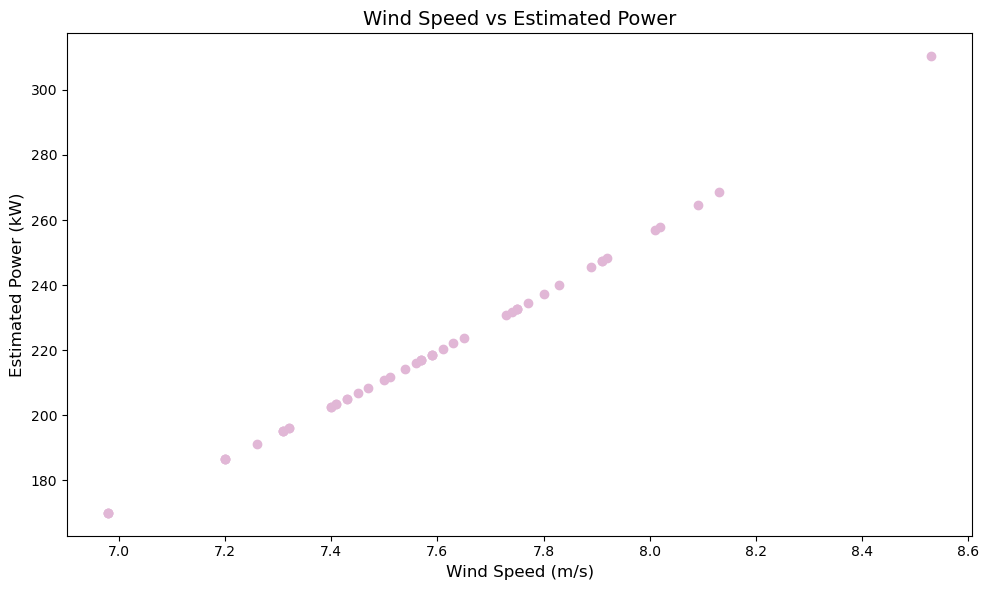

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(df_s['Wind Speed (m/s)'], df_s['Estimated Power (kW)'], color='#E1B7D6')

# Add title and labels
plt.title('Wind Speed vs Estimated Power', fontsize=14)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Estimated Power (kW)', fontsize=12)

plt.tight_layout()
plt.show()

#### This scatter plot visualizes the relationship between wind speed (in m/s) and the estimated power (in kW). The positive correlation between these two variables is evident, as higher wind speeds generally lead to higher estimated power values. The plot shows a consistent upward trend, with most of the points aligning along the increasing line, indicating that wind speed is a key factor in determining the estimated power output

#### *Top 5 Cities: Wind Power and Wind Speed Comparison*

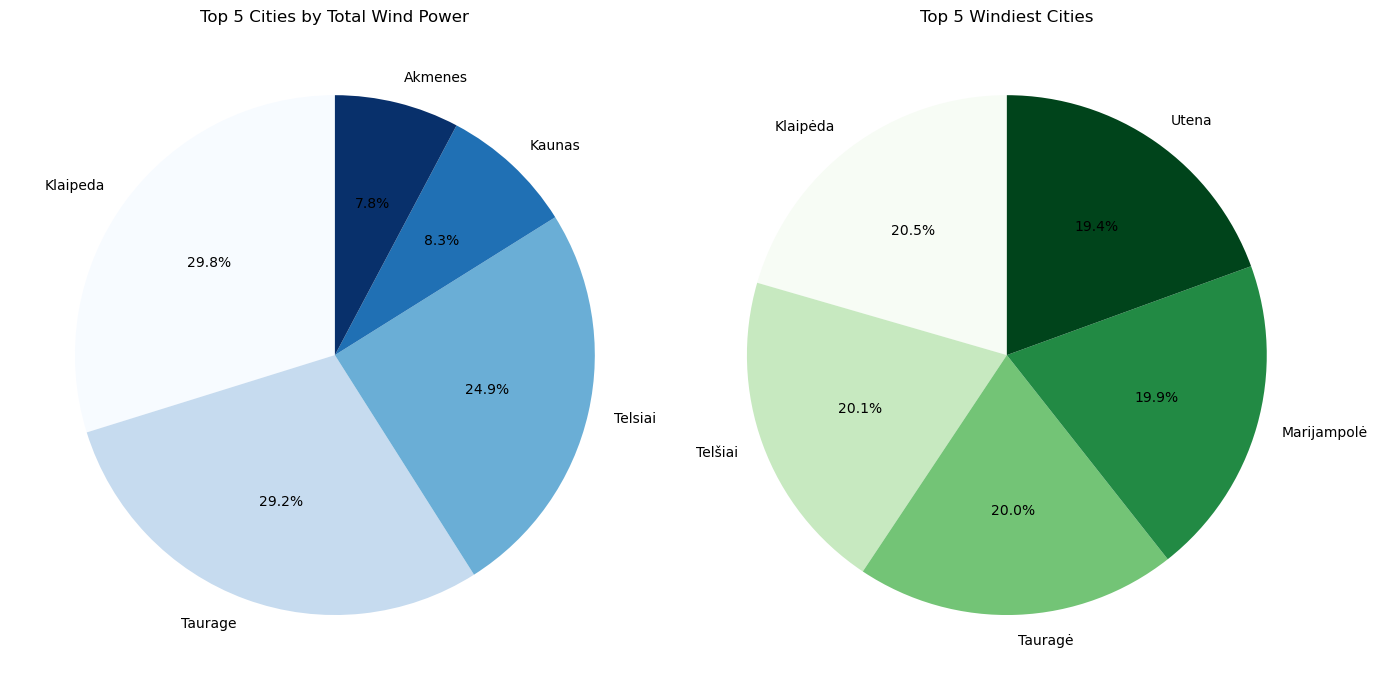

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for color palette

# Load the datasets
df_real_power = pd.read_excel("/Users/mortaaleksiejunaite/Downloads/lithuania_wind_farms.xlsx", usecols=[0, 1])
df_s = pd.read_excel("/Users/mortaaleksiejunaite/Downloads/Average_wind_speed.xlsx", usecols=[1, 2, 3])

# Clean 'City' column (if necessary)
df_s['City'] = df_s['City'].str.strip().str.capitalize()
df_real_power['Name'] = df_real_power['Name'].str.strip().str.capitalize()  # Clean 'Name' column in df_real_power

# Remove "Offshore" and select the top 5 cities by total power
df_real_power_filtered = df_real_power[df_real_power['Name'] != 'Offshore']
df_real_power_sorted = df_real_power_filtered.sort_values(by='Total Power (kW)', ascending=False).head(5)

# Cities with the highest average wind speed
city_wind_speeds = {}
for city in df_s['City'].unique():
    city_data = df_s[df_s['City'] == city]
    avg_wind_speed = city_data['Wind Speed (m/s)'].mean()
    city_wind_speeds[city] = avg_wind_speed

wind_speed_df = pd.DataFrame(list(city_wind_speeds.items()), columns=['City', 'Average Wind Speed (m/s)'])
wind_speed_df_sorted = wind_speed_df.sort_values(by='Average Wind Speed (m/s)', ascending=False).head(5)

# Plotting two pie charts side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 7))  # Set the size of the figure

# Pie chart for Total Power (kW)
ax[0].pie(df_real_power_sorted['Total Power (kW)'], labels=df_real_power_sorted['Name'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Blues(np.linspace(0, 1, len(df_real_power_sorted))))
ax[0].set_title('Top 5 Cities by Total Wind Power')

# Pie chart for Average Wind Speed (m/s)
ax[1].pie(wind_speed_df_sorted['Average Wind Speed (m/s)'], labels=wind_speed_df_sorted['City'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Greens(np.linspace(0, 1, len(wind_speed_df_sorted))))
ax[1].set_title('Top 5 Windiest Cities')

plt.tight_layout()  # Adjust layout for better fitting
plt.show()

#### This graph uses two pie charts to display different perspectives on wind power and wind speed in the top 5 cities in Lithuania.

- The left pie chart represents the distribution of total wind power generation across the top 5 cities. Klaipeda and Taurage lead the chart, contributing the most to Lithuania's wind power capacity.
- The right pie chart shows the top 5 windiest cities, with Utena and Marijampole standing out for their higher average wind speeds.

These visuals help highlight the cities that contribute significantly to both wind power generation and the availability of wind resources, potentially offering insights for future optimization of wind energy infrastructure in Lithuania.

### In coclusion, the analysis indicates that while wind power is a significant resource for Lithuania, certain regions with higher wind speeds are not fully utilized in the current wind farm infrastructure. By focusing on these areas, the country could enhance its wind power generation, contributing more effectively to energy independence. Optimizing the placement of wind farms in regions with the best wind resources would help Lithuania tap into its full potential for clean energy production

## Fifth analysis: Environmental Impact of energy self-sufficiency (Ugnė Kamarauskaitė)

In [10]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#### Lithuania aims to become energy self-sufficient by 2030, with a strong focus on wind energy.
#### The government plans to increase its installed wind power capacity substantially. It is important goal of building a sustainable, secure, and prosperous energy future. Thus I conducted an analysis with two scenarios, first projecting energy self-sufficiency growth based on previous year data in wind energy production and second projecting growth claiming that Lithuania will reach full self-sufficiency by 2030.

### Hypothesis: 
#### Wind power expansion is the most effective strategy for Lithuania to achieve 
#### - energy independence, 
#### - reduce emissions, 
#### - and meet EU compliance targets.

### Objectives: 
#### -Assess current energy dependency, 
#### - predict future wind energy production, 
#### - evaluate different growth scenarios, 
#### - calculate CO2 emissions reduction.

In [15]:
printmd('<hr style="border:2px solid black">')

<hr style="border:2px solid black">

#### Installing and importing necessary Python Modules

In [18]:
!pip install plotly
!pip install pandas openpyxl
!pip install matplotlib
!pip install seaborn

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import math

#### Opening first dataset on energy dependency in Lithuania

In [23]:
data = pd.read_csv("/Users/ugne_kam/Desktop/Book3.csv")
data.head(5)

,GEO (Labels),1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,European Union - 27 countries (from 2020),50.024,50.459,51.742,50.278,51.317,52.152,52.691,53.559,55.381,...,54.400,55.999,56.124,57.502,58.122,60.471,57.459,55.52,62.514,58.272
1,Euro area Ð 20 countries (from 2023),57.018,57.753,59.318,57.565,58.82,59.561,59.719,60.787,62.655,...,60.024,61.989,61.801,62.959,63.259,65.122,62.019,60.396,67.967,62.607
2,Belgium,75.267,77.077,78.167,76.775,79.863,80.952,80.543,78.419,80.851,...,80.190,84.227,75.982,75.318,83.044,77.668,78.131,70.903,74.029,76.097
3,Bulgaria,63.429,63.208,56.599,58.613,55.346,57.318,56.403,51.221,50.259,...,35.171,36.446,38.472,39.362,36.596,38.457,38.171,36.178,37.11,39.718
4,Czechia,15.179,15.609,15.701,15.836,18.641,20.454,24.186,24.032,25.024,...,30.227,32.089,32.800,37.162,36.879,40.810,38.768,39.958,41.775,41.676


Data Source: https://ec.europa.eu/eurostat/databrowser/view/NRG_IND_ID__custom_2053122/bookmark/table?lang=en&bookmarkId=ab15d0a5-9842-48b8-8e3f-38186e290408

#### Extracting the data of Lithuania in years 2019-2023 as other country and year data is not important for my analysis

In [28]:
lithuania_row = data[data.iloc[:, 0].str.contains("Lithuania", case=False, na=False)]

lithuania_recent_years = pd.concat([lithuania_row.iloc[:, :1], lithuania_row.iloc[:, -5:]], axis=1)
print("Energy dependence on imports in %")
lithuania_recent_years

Energy dependence on imports in %


,GEO (Labels),2019,2020,2021,2022,2023
16,Lithuania,75.202,74.909,73.272,72.434,68.044


#### Opening second dataset on energy consumption

In [31]:
data = pd.read_csv("/Users/ugne_kam/Desktop/energycommodities.csv")
data.head(5)

,Energy commodities balances/natural units,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2019.0,2020.0,2021.0,2022.0,2023.0,NaN
3,"Hydroenergy, GWh",Total gross production,345.4,300.5,383.7,464.4,450.2,NaN
4,NaN,Gross production in nuclear power plant,NaN,NaN,NaN,NaN,NaN,NaN


Data Source: https://osp.stat.gov.lt/385e590b-d095-43ce-9fae-635383a2d3b1

#### Extracting the data of wind energy production in years 2019-2023 and renaming the collumns according to the years

In [37]:
wind_energy_row = data[data.apply(lambda row: row.astype(str).str.contains('Wind energy, GWh', case=False, na=False).any(), axis=1)]
data.rename(
        columns={
            'Unnamed: 1': '',
            'Unnamed: 2': '2019',
            'Unnamed: 3': '2020',
            'Unnamed: 4': '2021',
            'Unnamed: 5': '2022',
            'Unnamed: 6': '2023',
            'Unnamed: 7': '2024',
            
        },
        inplace=True
    )
wind_energy_row.iloc[:, :7]

,Energy commodities balances/natural units,,2019,2020,2021,2022,2023
163,"Wind energy, GWh",Total gross production,1499.4,1551.7,1361.7,1512.4,2536.1


#### Opening third dataset on energy consumption

In [40]:
data = pd.read_csv("/Users/ugne_kam/Desktop/totalenergyconsumption.csv")
data.head(5)

,Energy balances,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Heat,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"Final consumption, total",Final consumption in industry,Final consumption in construction,Final consumption in transport,Final consumption in agriculture,Final consumption in fishing,Final consumption in comercial and public serv...,Final consumption in households,...,Final consumption in comercial and public serv...,Final consumption in households,"Final consumption, total",Final consumption in industry,Final consumption in construction,Final consumption in transport,Final consumption in agriculture,Final consumption in fishing,Final consumption in comercial and public serv...,Final consumption in households
3,Energy balances | TJ,2019.0,233762,44843,1787,95615,4633,53,26239,60592,...,12755,10486,35415,9210,63,NaN,151,NaN,7332,18659
4,NaN,2020.0,223499,41068,1817,91690,4758,36,24119,60011,...,11883,10959,30864,6455,60,NaN,143,NaN,6608,17598


Data Source: https://osp.stat.gov.lt/statistiniu-rodikliu-analize?indicator=S1R127?hash=7811fded-51bd-405c-9cac-4bdc636ddbbd#/

In [43]:
printmd('<hr style="border:2px solid black">')

<hr style="border:2px solid black">

## Part 1: Energy independence 

#### To predict energy independence, we need to compare future domestic production to the current total energy demand. The purpose  is to meet the total energy demand through domestic wind energy production. Thus I extract the data of total energy in 2023 and use it for further calculations as a baseline.

In [49]:
total_energy = data[data.apply(lambda row: row.astype(str).str.contains('2023', case=False, na=False).any(), axis=1)]
data.rename(
        columns={
            'Unnamed: 1': 'Year',
            'Unnamed: 2': 'Total energy consumption, Tj',
            
        },
        inplace=True
    )

total_energy = pd.concat([total_energy.iloc[:, [1]], total_energy.iloc[:, 2:3]], axis=1)
total_energy

,Year,"Total energy consumption, Tj"
7,2023.0,227219


#### Data was provided in terajoule, further conversion of total energy consumption to gigawatt-hour was done to standardize units. 1 GWh = 3.6 TJ.

In [52]:
total_in_Gwh = float(total_energy['Total energy consumption, Tj'].iloc[0]) / 3.6
total_in_Gwh

63116.38888888889

#### For Lithuania to become fully energy self-sufficient it needs to reach 100% independence in next 7 years. Further code calculates the required annual growth rate in wind energy to achieve this goal.

In [55]:
total_energy_demand = total_in_Gwh  # GWh
current_energy_production = float(wind_energy_row['2023'].iloc[0])  # GWh
target_years = 7  # Years to achieve 100% independence

def calculate_growth_rate(total_demand, current_production, years):
    return (total_demand / current_production) ** (1 / years) - 1 #compound formula

required_growth_rate = calculate_growth_rate(total_energy_demand, current_energy_production, target_years)* 100

print(f"To achieve 100% energy independence in {target_years} years, Lithuania needs an annual growth rate of: {required_growth_rate:.2f}%")

To achieve 100% energy independence in 7 years, Lithuania needs an annual growth rate of: 58.28%


#### However, looking back into recent data provided earlier, we can see that annual growth rate can not be close to this number in reality. A 58.28% annual growth rate seems highly ambitious, it would require massive and sustained investments in wind energy infrastructure, technology, could strain recources.

#### Thus another more modest but realistic scenario, based on previous years data will be created. Annual growth rate calculation for this scenario:

In [59]:
dependencies = pd.to_numeric(lithuania_recent_years.iloc[0, 1:], errors="coerce")

years = len(dependencies) - 1  # Years from 2019 to 2023

def calculate_average_growth_rate(dependencies, years):
    initial = dependencies.iloc[0]  # First year's dependency
    final = dependencies.iloc[-1]   # Last year's dependency
    return (final / initial) ** (1 / years) - 1

average_growth_rate = calculate_average_growth_rate(dependencies, years)

# Convert to percentage
average_growth_rate_percentage = average_growth_rate * -100

print(f"Average Annual Growth Rate: {average_growth_rate_percentage:.2f}%")

Average Annual Growth Rate: 2.47%


#### We can see that the annual growth rate of wind energy is way less in reality. Now having both scenarios, wind energy expansion simulation could be done. Output contains energy production and dependence level from year 2023-2030

In [65]:
current_wind_capacity = 671  # in MW (current installed wind capacity according to Lithuanian wind energy association)
current_energy_production = float(wind_energy_row['2023'].iloc[0])  # in GWh 
current_dependency_level = float(lithuania_recent_years['2023'].iloc[0])  # in % 
total_energy_demand = total_in_Gwh  # in GWh 

# Function to simulate wind expansion
def wind_expansion_scenario (scenario, years=7):
    if scenario == "realistic":
        annual_growth_rate = average_growth_rate_percentage/ 100
    elif scenario == "idealistic":
        annual_growth_rate = int (required_growth_rate) /100
    
    wind_capacity = current_wind_capacity
    dependency_levels = []
    production_per_year = []

    for year in range(years):
        wind_capacity *= (1 + annual_growth_rate)
        energy_production = wind_capacity * (current_energy_production / current_wind_capacity)
        production_per_year.append(energy_production)
        dependency_level = max(0, current_dependency_level - (energy_production / total_energy_demand) * 100)
        dependency_levels.append(dependency_level)

    return {
        "years": np.arange(1, years + 1),
        "energy_production": production_per_year,
        "dependency_levels": dependency_levels
    }
realistic_results = wind_expansion_scenario("realistic", years=7)
idealistic_results = wind_expansion_scenario("idealistic", years=7)

realistic_df = pd.DataFrame({
    "Year": realistic_results["years"],
    "Energy Production (GWh)": realistic_results["energy_production"],
    "Dependency Level (%)": realistic_results["dependency_levels"]
})
idealistic_df = pd.DataFrame({
    "Year": idealistic_results["years"],
    "Energy Production (GWh)": idealistic_results["energy_production"],
    "Dependency Level (%)": idealistic_results["dependency_levels"]
})

print("Realistic Wind Expansion Results:")
print(realistic_df)

print("Idealistic Wind Expansion Results:")
print(idealistic_df)

Realistic Wind Expansion Results:
   Year  Energy Production (GWh)  Dependency Level (%)
0     1              2598.730923             63.926637
1     2              2662.908563             63.824955
2     3              2728.671120             63.720763
3     4              2796.057733             63.613997
4     5              2865.108510             63.504595
5     6              2935.864549             63.392491
6     7              3008.367961             63.277618
Idealistic Wind Expansion Results:
   Year  Energy Production (GWh)  Dependency Level (%)
0     1              4007.038000             61.695351
1     2              6331.120040             58.013135
2     3             10003.169663             52.195233
3     4             15805.008068             43.002948
4     5             24971.912747             28.479137
5     6             39455.622141              5.531517
6     7             62339.882982              0.000000


#### Data ilustration with graphs

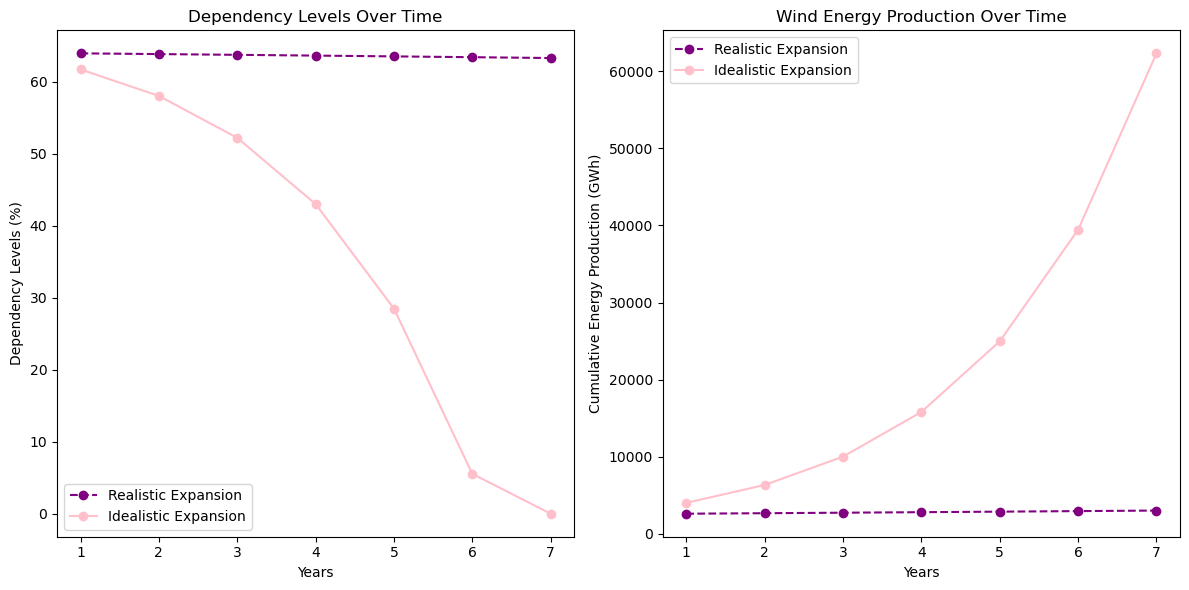

In [68]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(realistic_results["years"], realistic_results["dependency_levels"], label="Realistic Expansion", linestyle='--', marker='o', color='purple')
plt.plot(idealistic_results["years"], idealistic_results["dependency_levels"], label="Idealistic Expansion", marker='o', color='pink')
plt.xlabel("Years")
plt.ylabel("Dependency Levels (%)")
plt.title("Dependency Levels Over Time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(realistic_results["years"], realistic_results["energy_production"], label="Realistic Expansion", linestyle='--', marker='o', color='purple')
#plt.plot(realistic_results["years"], np.cumsum(realistic_results["energy_production"]), label="Realistic Expansion", linestyle='--')
plt.plot(idealistic_results["years"], idealistic_results["energy_production"], label="Idealistic Expansion", marker='o', color='pink')
#plt.plot(idealistic_results["years"], np.cumsum(idealistic_results["energy_production"]), label="Idealistic Expansion")
plt.xlabel("Years")
plt.ylabel("Cumulative Energy Production (GWh)")
plt.title("Wind Energy Production Over Time")
plt.legend()

plt.tight_layout()
plt.show()

### Implications and conclusions from part 1:

#### As it can be seen, the idealistic scenario of reaching 100% energy self-sufficiency only with wind energy production until 2030 is unrealisticly ambitious compared to historical data, implementations such as: 
#### - prioritising steady growth (setting more achievable annual growth rates while extending the timeline) or 
#### - diversifying energy sources (using a mix of wind, solar, hydro, and other renewable resources) 
#### should be considered to meet total energy demand.

In [71]:
printmd('<hr style="border:2px solid black">')

<hr style="border:2px solid black">

## **Part 2: Environmental impact assessment**

#### Lithuania produced 11.7 million metric tons of carbon dioxide from energy use in 2023 according to Statista.com

#### As the value was provided in tons, further conversion to gigawatt-hour was done to standardize units. 1 GWh = 85,8 t.

In [76]:
co2_emissions_t = 11700000
co2_emissions_tGWh = co2_emissions_t / 85.8
co2_emissions_tGWh

136363.63636363638

#### Checking if result values are being taken correctly

In [79]:
energy_production_values = realistic_results["energy_production"]
energy_production_values

[2598.730922542229,
 2662.90856345459,
 2728.671120126158,
 2796.057733259646,
 2865.1085101672543,
 2935.864548641828,
 3008.367961417532]

#### CO₂ emissions reduction and EU compliance calculation according to both scenarios

#### Realistic scenario:

In [91]:
co2_emissions_GWh = 820  # average tons/GWh 
total_in_Gwh = co2_emissions_tGWh  # Total energy demand in GWh
realistic_results = realistic_results 

# Function to calculate CO₂ reductions
def calculate_co2_reduction(total_in_Gwh, emission_factor):
    return total_in_Gwh * emission_factor

# Renewable energy compliance calculation
def calculate_renewable_share(wind_energy, total_in_Gwh):
    return (wind_energy / total_in_Gwh) * 100

# Simulate future wind energy production
cumulative_energy = np.cumsum(realistic_results["energy_production"])
final_wind_energy = cumulative_energy[-1]  # Total energy over 7 years

co2_reduction = calculate_co2_reduction(final_wind_energy, co2_emissions_GWh)

renewable_share = calculate_renewable_share(final_wind_energy, total_in_Gwh)

print(f"Total CO₂ Reduction over 7 years: {co2_reduction:.2f} tons")
print(f"Renewable Energy Share by 2030: {renewable_share:.2f}%")

# EU renewable energy target compliance
if renewable_share >= 42.5:
    print("Lithuania meets the EU renewable energy target with realistic scenario.")
else:
    print("Lithuania does not meet the EU renewable energy target with realistic scenario.")

Total CO₂ Reduction over 7 years: 16068481.67 tons
Renewable Energy Share by 2030: 14.37%
Lithuania does not meet the EU renewable energy target with realistic scenario.


#### Idealistic scenario:

In [94]:
co2_emissions_GWh = 820  # tons/GWh 
total_in_Gwh = co2_emissions_tGWh  # Total energy demand in GWh
idealistic_results = idealistic_results # Example values

# Function to calculate CO₂ reductions
def calculate_co2_reduction(total_in_Gwh, emission_factor):
    return total_in_Gwh * emission_factor

# Renewable energy compliance calculation
def calculate_renewable_share(wind_energy, total_in_Gwh):
    return (wind_energy / total_in_Gwh) * 100

# Simulate future wind energy production
cumulative_energy = np.cumsum(idealistic_results["energy_production"])
final_wind_energy = cumulative_energy[-1]  # Total energy over 7 years

co2_reduction = calculate_co2_reduction(final_wind_energy, co2_emissions_GWh)

renewable_share = calculate_renewable_share(final_wind_energy, total_in_Gwh)

print(f"Total CO₂ Reduction over 7 years: {co2_reduction:.2f} tons")
print(f"Renewable Energy Share by 2030: {renewable_share:.2f}%")

# EU renewable energy target compliance
if renewable_share >= 42.5:
    print("Lithuania meets the EU renewable energy target with idealistic scenario.")
else:
    print("Lithuania does not meet the EU renewable energy target with idealistic scenario.")

Total CO₂ Reduction over 7 years: 133589277.99 tons
Renewable Energy Share by 2030: 119.47%
Lithuania meets the EU renewable energy target with idealistic scenario.


### Implications and conclusions from part 2:

#### This analysis suggests the growth rate of wind energy in the realistic scenario is not sufficient to meet EU targets. Thus acceleration of wind energy capacity growth could be reached with incorporation of other renewable sources (solar, hydro, biomass), energy efficiency. The idealistic scenario renewable share of whish is over 100% suggests that energy production far exceeds demand, which is unrealistic, thus becoming fully self-sufficient using wind energy until 2030 is not a realistic case.

In [98]:
printmd('<hr style="border:2px solid black">')

<hr style="border:2px solid black">

### Conclusions 

#### - My hypothesis was close, analysis suggested that wind power expansion is effective strategy for Lithuania to achieve energy independence, reduce emissions, and meet EU compliance targets, thus trying to achieve self-suffiency through acceleration of wind energy production without other renewable sources until 2023, seems to be not so realistic.

#### Limits and recomendations: 
##### The analysis faced several challenges, primarily due to the lack of available datasets. Some numerical data was based on estimates, leading to noticeable inaccuracies in the outputs as well as not all requirements could be met with the dta available. To conduct a more precise and accurate analysis, I recomend to obtain reliable datasets from government or energy agency databases.The code focused exclusively on wind energy without considering other renewable options such as solar or biomass. Consequently, the idealistic scenario of achieving energy self-sufficiency solely through wind energy expansion by 2030 proved to be highly unrealistic. This also affected other significant inaccuracies in outputs. For more in-depth case analysis economic feasibility could be investicated - comparison between the transition cost of wind power with current expenditures on energy imports.

# **General Overview**


#### This project examines Lithuania's energy landscape, focusing on the potential of transitioning to wind power to achieve energy independence while aligning with environmental goals. By analysing multiple factors of the energy sector, the study highlights key findings:

- **Current Energy Mix:** Lithuania's dependency on imported energy sources emphasis the need for a sustainable and self-sufficient strategy. Transitioning to renewable energy, particularly wind power, could reduce reliance on external energy supplies.

- **Wind Resource Potential:** Lithuania's geographical and climatic conditions are highly favourable for wind energy development. The country's wind resource potential provides a solid foundation for scaling up renewable energy production.

- **Existing Wind Power Infrastructure:** While significant progress has been made in establishing wind power facilities, there is considerable room for expansion to meet future energy demands and enhance infrastructure efficiency.

- **Energy Consumption Trends and Projections:** Analysis of energy consumption patterns indicates both challenges and opportunities. Projections show that increasing wind energy capacity can cater to growing demand while ensuring stability in the energy grid.

- **Environmental Impact:** Transitioning to wind power aligns with Lithuania's environmental commitments, offering substantial reductions in greenhouse gas emissions and mitigating the environmental impacts associated with fossil fuel-based energy production.

## Final Assessment

#### The transition to wind power presents a viable pathway for Lithuania to achieve energy independence and meet environmental objectives. The findings support the hypothesis, demonstrating that with strategic investments, policy support, and public-private collaboration, wind energy can play an important role in shaping Lithuania's sustainable energy future. Continued focus on infrastructure development, technological advancements, and environmental monitoring will be essential to maximise the benefits of this transition.

